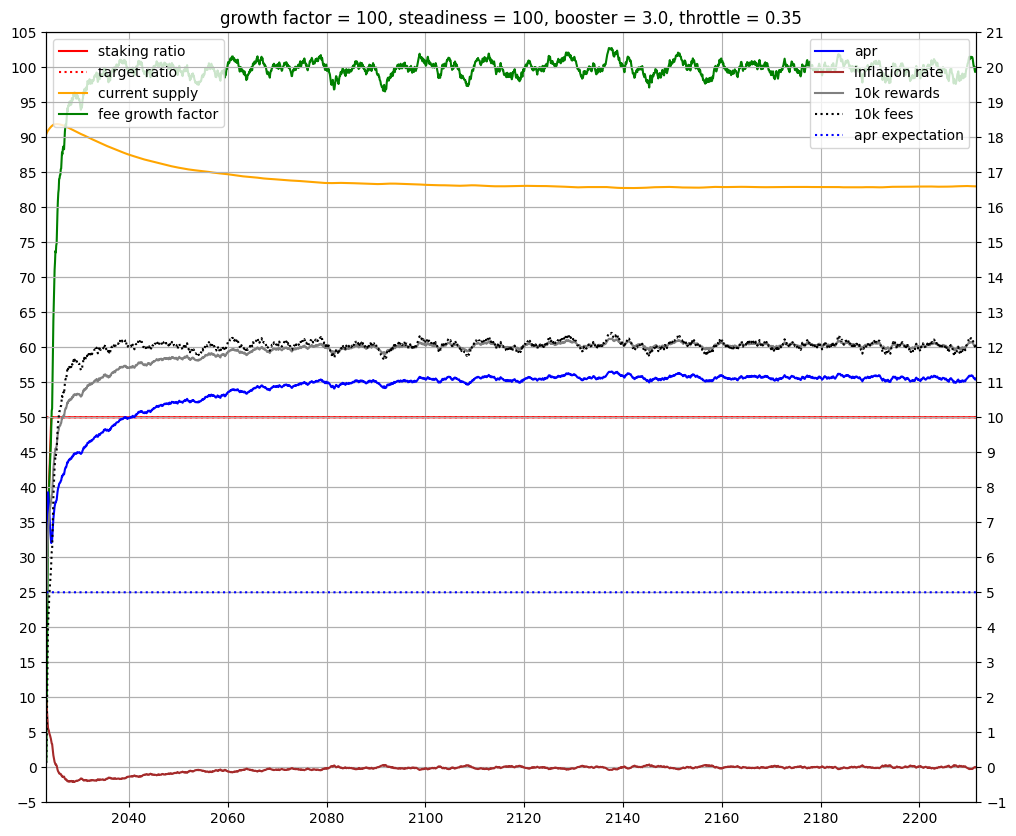

('min(apr)', 6.407108527809335, 'max(apr)', 11.306956808223683, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 91.88763750210121, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 11.069273509479414)


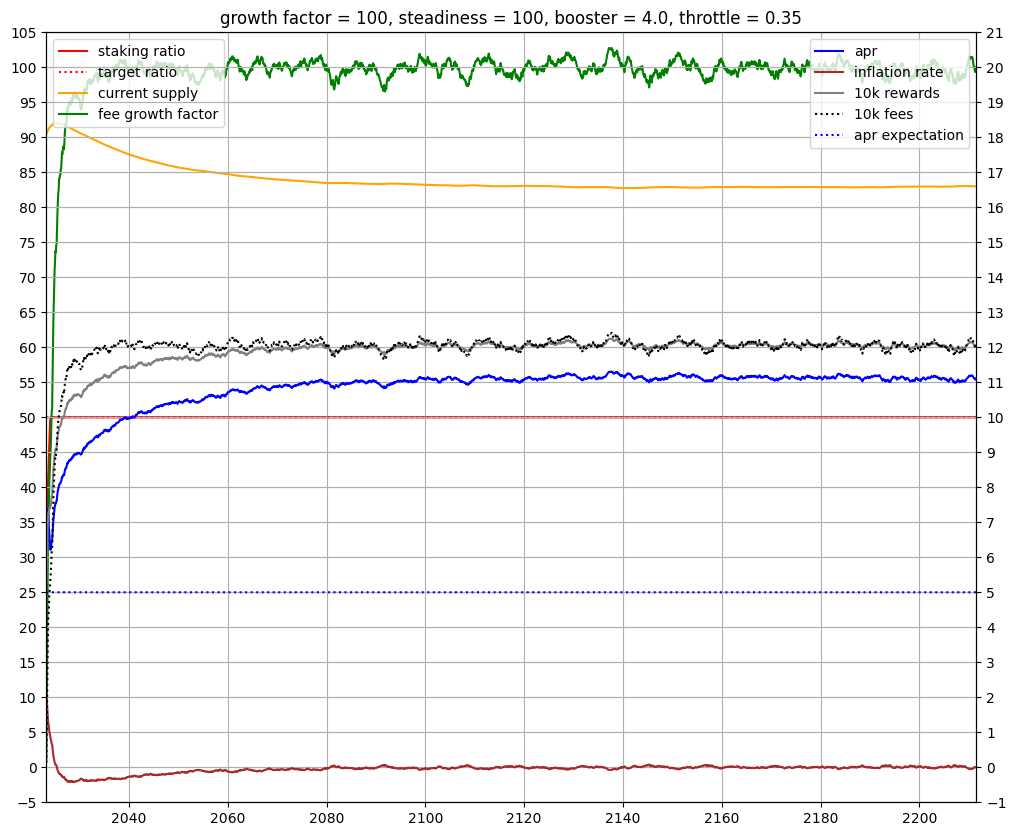

('min(apr)', 6.210636085857017, 'max(apr)', 11.306871204896211, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 91.99966737895996, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 11.069256311018762)


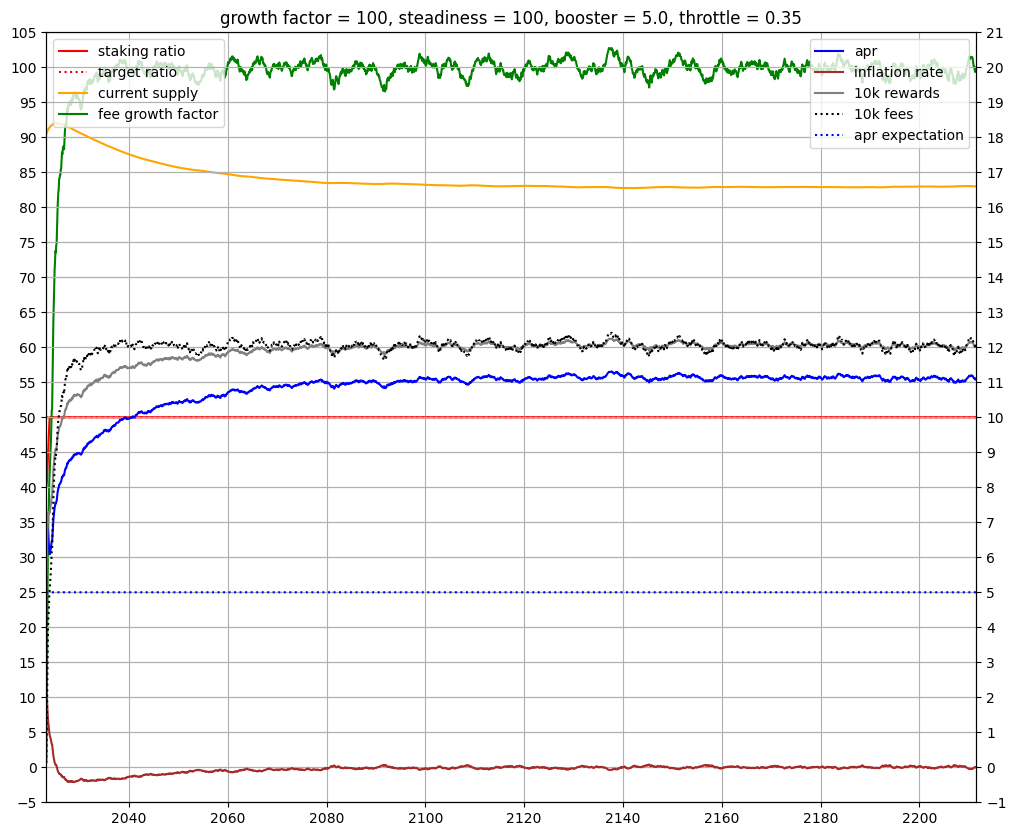

('min(apr)', 5.802882853015777, 'max(apr)', 11.306861909606264, 'min(ratio)', 40.0, 'max(ratio)', 50.0, 'max(supply)', 92.01187717732017, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 11.069254443522079)


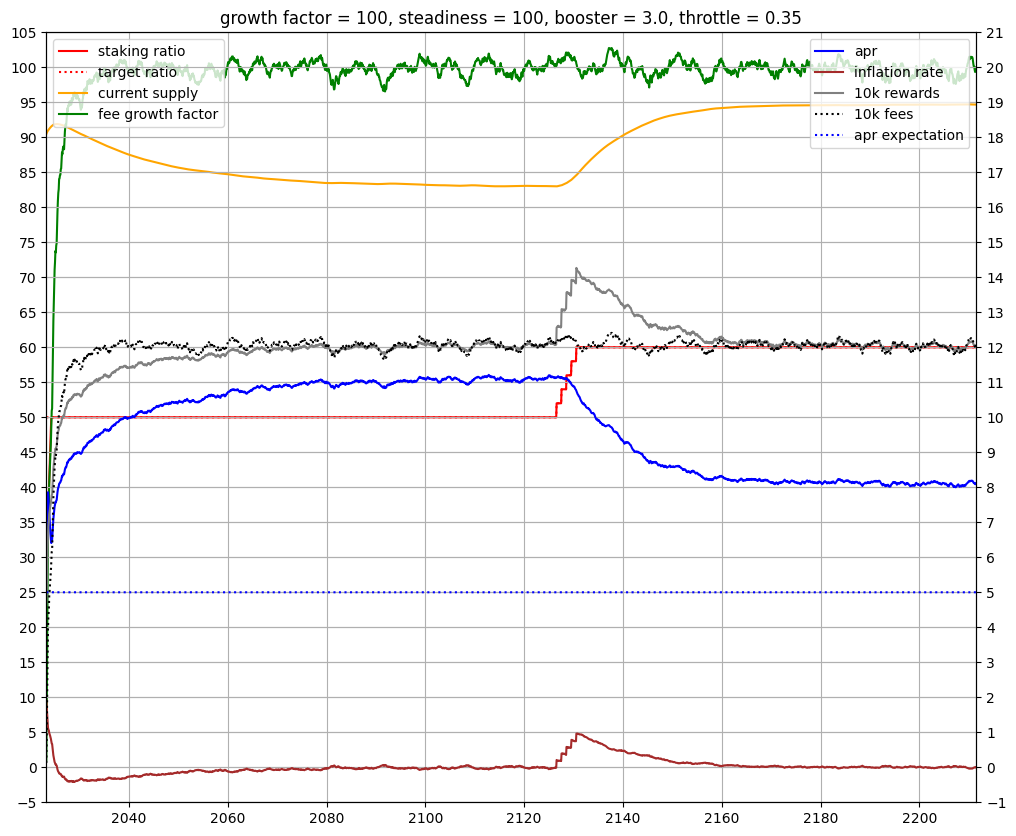

('min(apr)', 6.407108527809335, 'max(apr)', 11.211867492391852, 'min(ratio)', 30.0, 'max(ratio)', 60.0, 'max(supply)', 94.71375024248458, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 9.996297979946366)


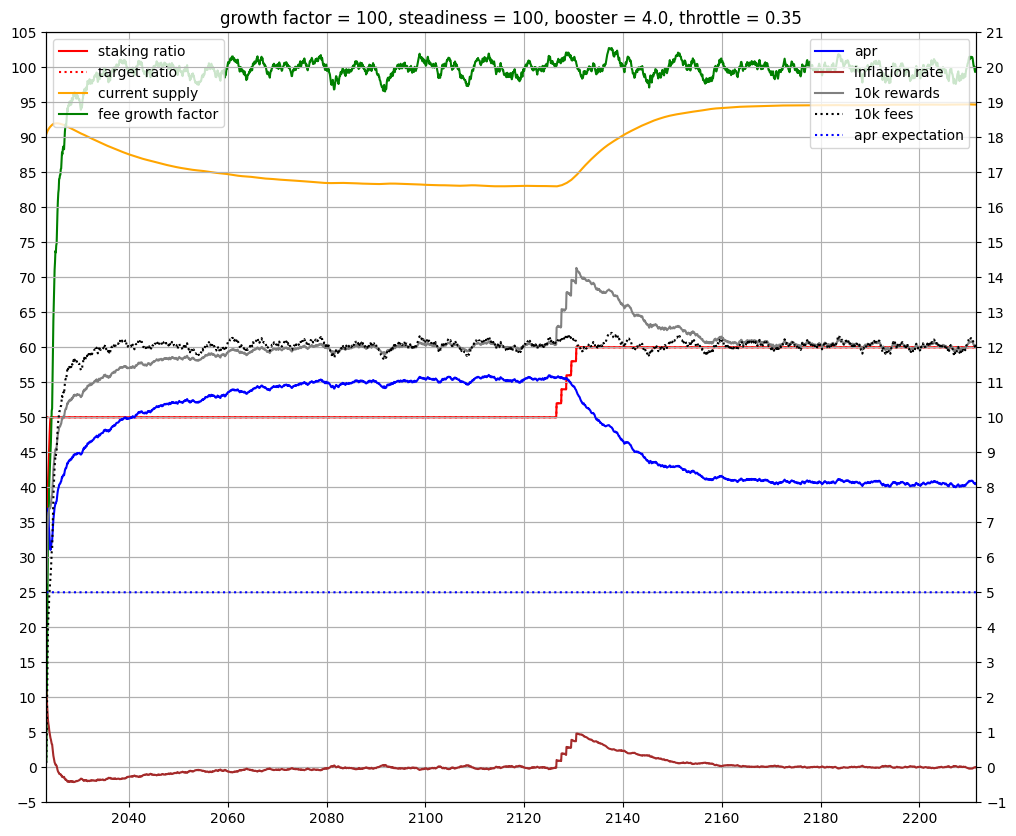

('min(apr)', 6.210636085857017, 'max(apr)', 11.211589389898604, 'min(ratio)', 35.0, 'max(ratio)', 60.0, 'max(supply)', 94.71375032615458, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 9.985229068438223)


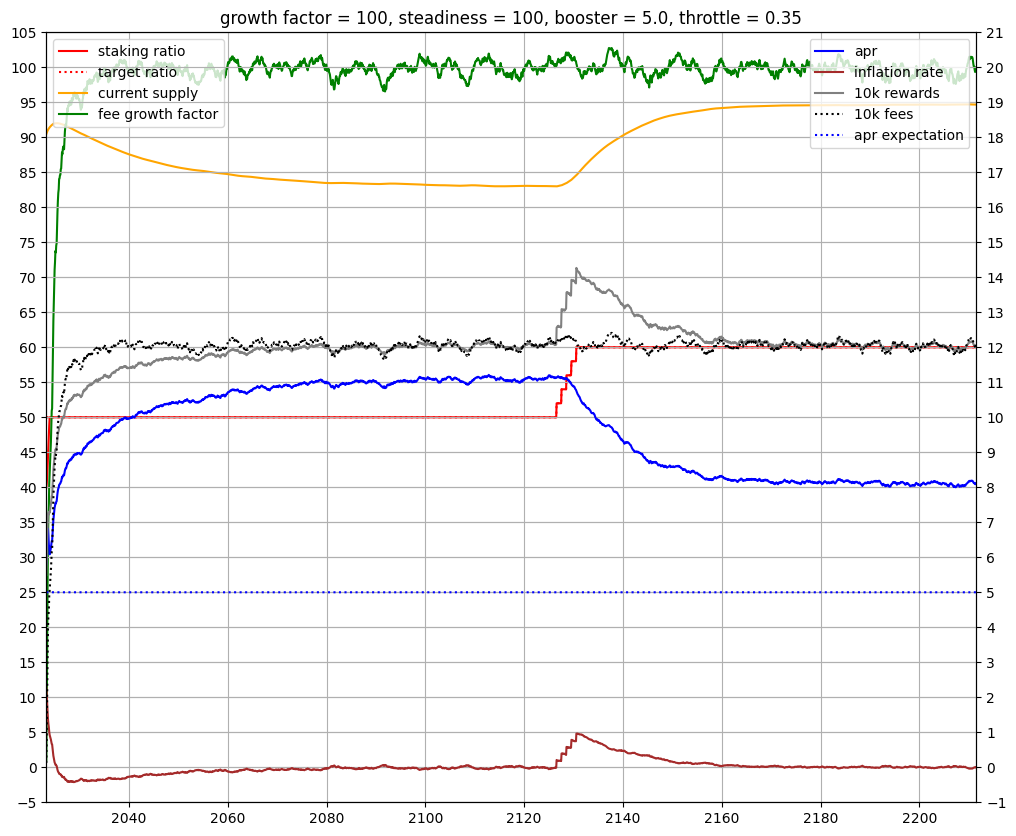

('min(apr)', 5.802882853015777, 'max(apr)', 11.211559191553665, 'min(ratio)', 40.0, 'max(ratio)', 60.0, 'max(supply)', 94.71375033523975, 'max(factor)', 102.75199999999992, 'median(factor)', 99.80899999999995, 'median(tps)', 34.340534062499984, 'median(ratio)', 50.0, 'median(apr)', 9.984025622828945)
--------------------------------------------------


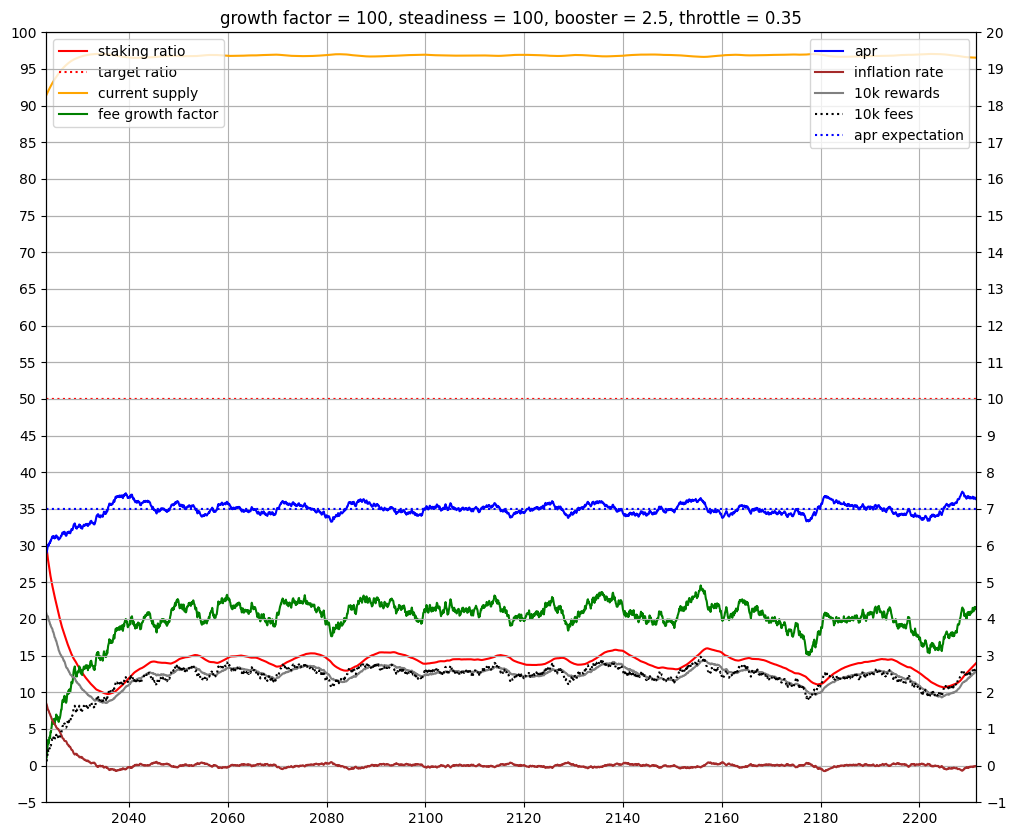

('min(apr)', 5.789766459492587, 'max(apr)', 7.47105397848049, 'min(ratio)', 9.759503826359962, 'max(ratio)', 30.0, 'max(supply)', 97.04875151156196, 'max(factor)', 24.57399999999999, 'median(factor)', 20.595999999999986, 'median(tps)', 7.086311249999995, 'median(ratio)', 14.180426649640465, 'median(apr)', 6.990720233613147)


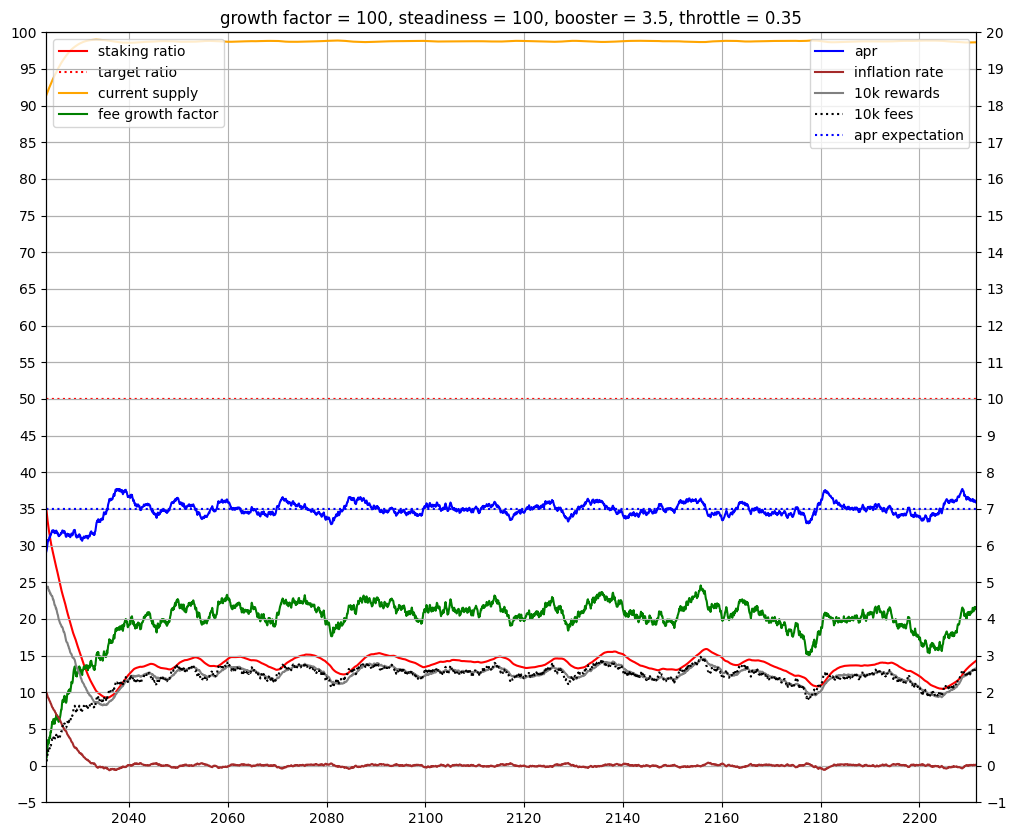

('min(apr)', 5.843936064265448, 'max(apr)', 7.544576792176043, 'min(ratio)', 9.253513764855146, 'max(ratio)', 35.0, 'max(supply)', 98.99254944459436, 'max(factor)', 24.57399999999999, 'median(factor)', 20.595999999999986, 'median(tps)', 7.086311249999995, 'median(ratio)', 13.835016089285007, 'median(apr)', 6.981158690395195)


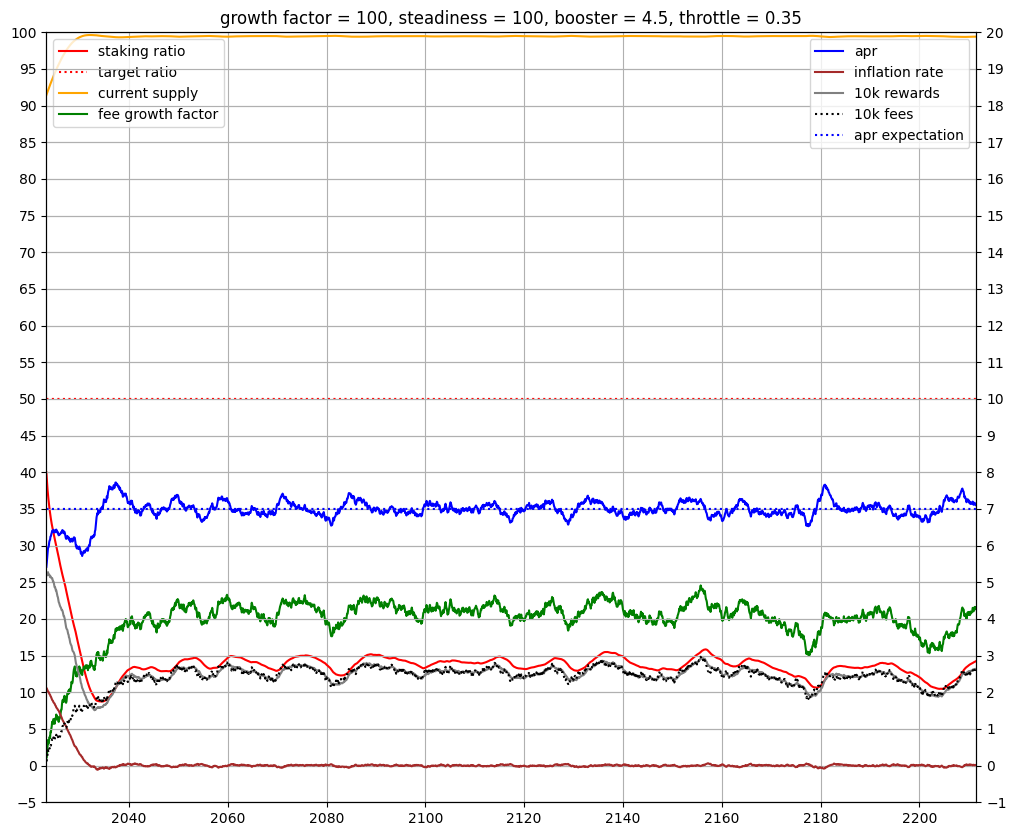

('min(apr)', 5.421600907517155, 'max(apr)', 7.721136893697391, 'min(ratio)', 8.739945647504207, 'max(ratio)', 40.0, 'max(supply)', 99.62958511201494, 'max(factor)', 24.57399999999999, 'median(factor)', 20.595999999999986, 'median(tps)', 7.086311249999995, 'median(ratio)', 13.721006924712587, 'median(apr)', 6.975671795804722)


In [1236]:
import matplotlib.pyplot as plt
import numpy as np
import dateutil.relativedelta as rd
import datetime as dt
import math
import statistics
import random

def generate(months, target_factor, growth_steadiness = 100):
    global month
    global fees
    global fee_factor
    month = np.array([dt.date(2023, 3, 24)] * months)
    fees = np.array([0.0] * months)
    fee_factor = np.array([0.0] * months)
    for i,_ in enumerate(month):
        month[i] = month[i] + rd.relativedelta(months=+i)
        if i == 0:
            fees[i] = 1208.0
        else:
            fees[i] = max(0, fees[i-1] + (random.randint(-500, 500 + int((target_factor - fee_factor[i-1]) * growth_steadiness)) / 1000.0) * fees[0])
        fee_factor[i] = fees[i] / fees[0] 

def display(title, start = 0, end = 0):
    global month
    global tps
    global ratio
    global apr
    global rewards
    global fees
    global fee_factor
    global supply
    global inflation
    global target_ratio
    global expected_apr
    new_target_ratio = 0
    list_target_ratio = np.array([0.0] * (end+1))
    for i in range(start, end+1):
        if i in target_ratio:
            new_target_ratio = target_ratio[i]
        list_target_ratio[i] = new_target_ratio
    new_expected_apr = 0
    list_expected_apr = np.array([0.0] * (end+1))
    for i in range(start, end+1):
        if i in expected_apr:
            new_expected_apr = expected_apr[i]
        list_expected_apr[i] = new_expected_apr
    fig, ax1 = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(12)
    ax1.set_ylabel('', ha='left', va='center', color='black')
    ax1.margins(0)
    ax1.plot(month[start:end+1], ratio[start:end+1], 'red', label='staking ratio')
    ax1.plot(month[start:end+1], list_target_ratio[start:end+1], 'r:', label='target ratio')
    ax1.plot(month[start:end+1], supply[start:end+1], 'orange', label='current supply')
    ax1.plot(month[start:end+1], fee_factor[start:end+1], 'green', label='fee growth factor')
    ax1.tick_params(axis='y', labelcolor='black')
    range1 = [*range(min(-5, ((int(min(inflation) * 5) - 1) // 5 ) * 5), max(101, int(max(fee_factor)) + 6), 5)]
    range2 = [i / 5 for i in range1]
    ax1.set_yticks(range1)
    ax2 = ax1.twinx()
    ax2.set_ylabel('', ha='left', va='center', color='black')
    ax2.margins(0)
    ax2.plot(month[start:end+1], apr[start:end+1], 'blue', label='apr')
    ax2.plot(month[start:end+1], inflation[start:end+1], 'brown', label='inflation rate')
    ax2.plot(month[start:end+1], rewards[start:end+1]/10000, 'grey', label='10k rewards')
    ax2.plot(month[start:end+1], fees[start:end+1]/10000, 'k:', label='10k fees')
    ax2.plot(month[start:end+1], list_expected_apr[start:end+1], 'b:', label='apr expectation')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.set_yticks(range2)
    #fig.tight_layout()
    ax1.grid()
    ax2.grid()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(title)
    plt.show()
    #print("month     ratio  rewards    fees  supply    apr   inflation  factor tps")
    #txt = "{:%Y-%m}   {:4.1f}%   {:6.0f}  {:6.0f}  {:5.2f}%  {:5.2f}% {:5.2f}%    {:3.0f}x   {:5.1f}"
    #[print(txt.format(a,b,c,d,e,f,g,h,i)) for a,b,c,d,e,f,g,h,i in zip(month[start:end+1], ratio[start:end+1], rewards[start:end+1], fees[start:end+1], supply[start:end+1], apr[start:end+1], inflation[start:end+1], fee_factor[start:end+1], fee_factor[start:end+1]*tps)]
    return 'min(apr)', min(apr), 'max(apr)', max(apr), 'min(ratio)', min(ratio), 'max(ratio)', max(ratio), 'max(supply)', max(supply), 'max(factor)', max(fee_factor), 'median(factor)', statistics.median(fee_factor), 'median(tps)', tps * statistics.median(fee_factor), 'median(ratio)', statistics.median(ratio), 'median(apr)', statistics.median(apr)
        
def simulate(months, block_reward, initial_ratio = 35.0, initial_reserve = 2000000000.0, booster = 1.0, throttle = 1.0, mode = 1, **arg):
    global month
    global ratio
    global apr
    global rewards
    global fees
    global supply
    global inflation
    global expected_apr
    global target_ratio
    ratio = np.array([0.0] * months)
    apr = np.array([0.0] * months)
    rewards = np.array([0.0] * months)
    supply = np.array([0.0] * months)
    inflation = np.array([0.0] * months)
    max_supply = 21000000000.0
    zil = max_supply - initial_reserve
    current_expected_apr = 0
    current_target_ratio = 0
    
    for i,_ in enumerate(month):
        supply[i] = 100 * zil / max_supply
        if i in expected_apr:
            current_expected_apr = expected_apr[i]
        if i in target_ratio:
            current_target_ratio = target_ratio[i]
        if i == 0:
            ratio[i] = initial_ratio
        else:
            ratio[i] = min(current_target_ratio, ratio[i-1] * (1 + 0.1 * (apr[i-1] - current_expected_apr) / current_expected_apr))
        match mode:
            case 1:
                rewards[i] = booster**((current_target_ratio - ratio[i]) / current_target_ratio) * (ratio[i] / 100) \
                            * (block_reward * ((1 - supply[i] / 100) / 0.1)**throttle + fees[i])
            case _: # old formula
                rewards[i] = 0.20 * block_reward + 0.60 * fees[i] * (1 - math.sqrt(abs(current_target_ratio / 100 - ratio[i] / 100)))
        apr[i] = 100 * rewards[i] * 22 * 365 / (max_supply * supply[i] / 100 * ratio[i] / 100) 
        inflation[i] = 100 * (rewards[i] - fees[i]) * 22 * 365 / zil
        zil += (rewards[i] - fees[i]) * 22 * 365 / 12

months = 2260+1
tps = 1101 / 100 / 32 # 100 blocks per epoch, 32s block interval

print('\n' * 0)
# corner case 1a:
# - high remaning reserve
# - very fast transaction growth to 100x
# - low apr expectation, all the higher the staking ratio will rise
generate(months, 100, 100)
expected_apr = {0: 5.0} # the lower it is the higher the staking ratio will settle  
target_ratio = {0: 50.0}
simulate(months, 100000.0, 30.0, 2000000000.0, 3.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 3.0, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 35.0, 2000000000.0, 4.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 4.0, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 40.0, 2000000000.0, 5.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 5.0, throttle = 0.35', 0, 2260))
# corner case 1b:
# trade higher staking ration for lower apr
target_ratio = {0: 50.0, 1240: 52.0, 1252: 54.0, 1264: 56.0, 1276: 58.0, 1288: 60.0}
simulate(months, 100000.0, 30.0, 2000000000.0, 3.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 3.0, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 35.0, 2000000000.0, 4.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 4.0, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 40.0, 2000000000.0, 5.0, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 5.0, throttle = 0.35', 0, 2260))
print('-' * 50)
# corner case 2:
# - low remaining reserve
# - very slow transaction growth to only 20x
# - high apr expectation, all the lower the staking ratio will fall 
generate(months, 20, 20)
expected_apr = {0: 7.0} # the higher it is the lower the staking ratio will settle  
target_ratio = {0: 50.0}
simulate(months, 100000.0, 30.0, 1800000000.0, 2.5, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 2.5, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 35.0, 1800000000.0, 3.5, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 3.5, throttle = 0.35', 0, 2260))
simulate(months, 100000.0, 40.0, 1800000000.0, 4.5, 0.35)
print(display('growth factor = 100, steadiness = 100, booster = 4.5, throttle = 0.35', 0, 2260))

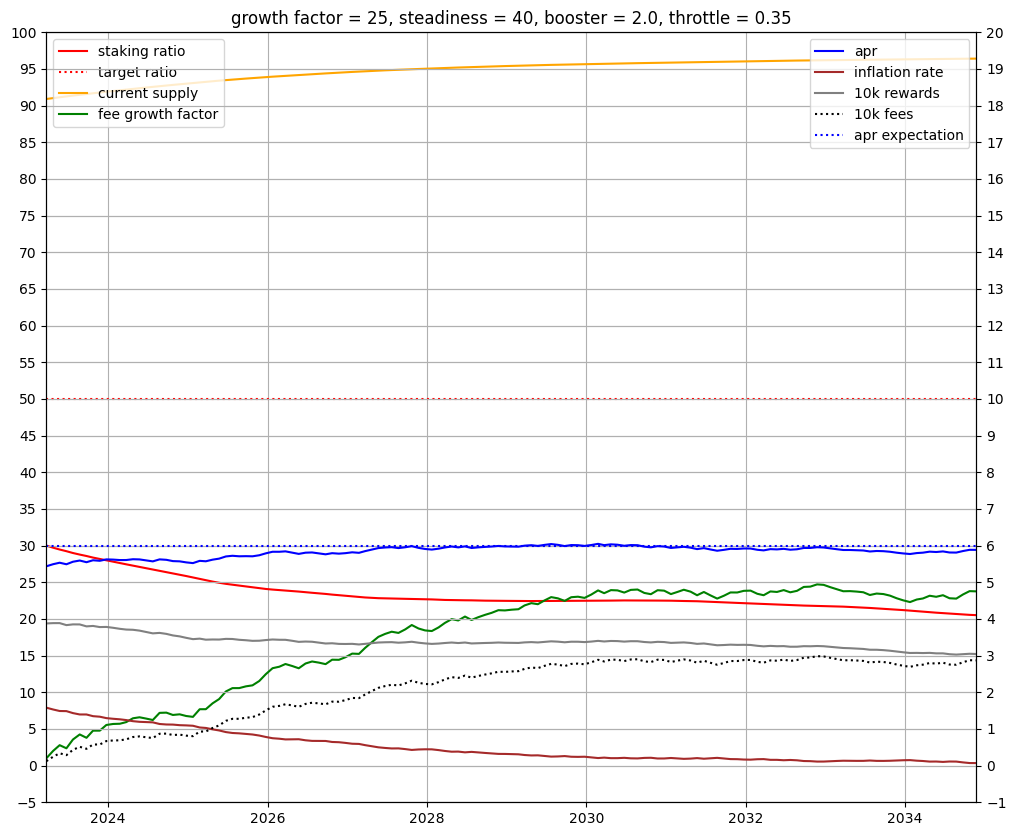

('min(apr)', 5.436210824511933, 'max(apr)', 6.217783520417533, 'min(ratio)', 18.464577884871794, 'max(ratio)', 30.0, 'max(supply)', 96.59632996202296, 'max(factor)', 28.758000000000003, 'median(factor)', 25.302999999999976, 'median(tps)', 8.705813437499991, 'median(ratio)', 20.346553718951352, 'median(apr)', 5.9965895584313635)


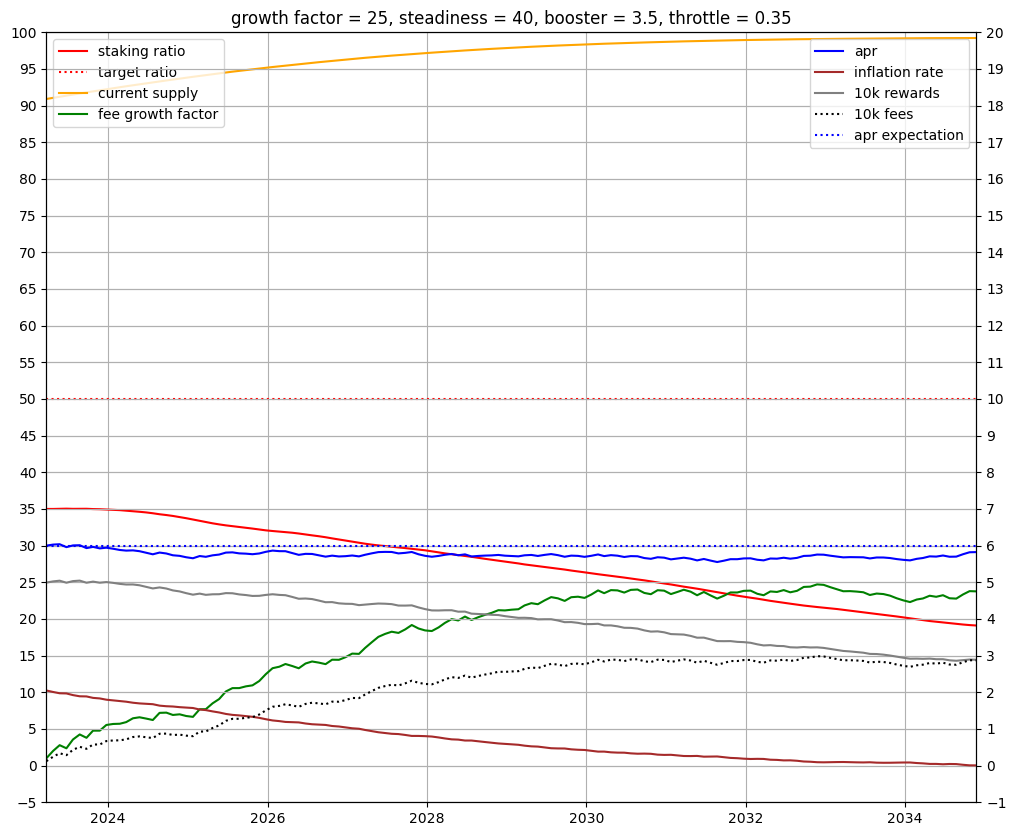

('min(apr)', 5.552317937342292, 'max(apr)', 6.2578544534437475, 'min(ratio)', 17.64161414475623, 'max(ratio)', 35.037927986576435, 'max(supply)', 99.23550302954666, 'max(factor)', 28.758000000000003, 'median(factor)', 25.302999999999976, 'median(tps)', 8.705813437499991, 'median(ratio)', 19.75080118694389, 'median(apr)', 5.995013520349649)


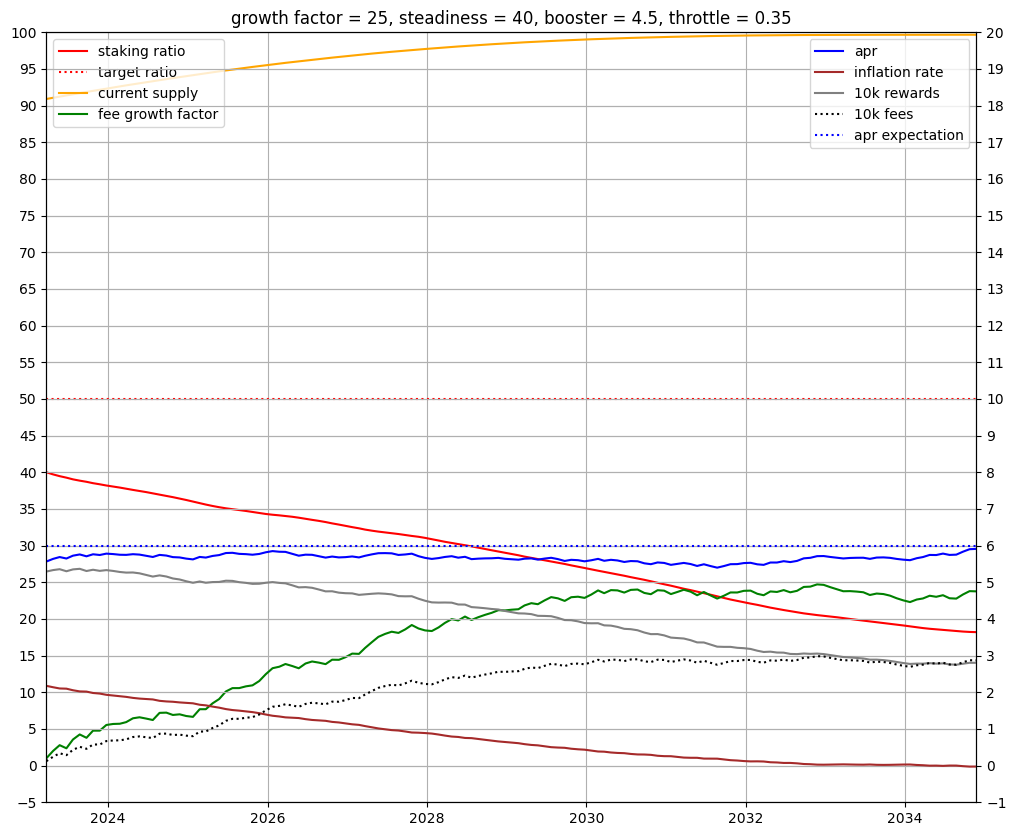

('min(apr)', 5.398695749775241, 'max(apr)', 6.300347371870729, 'min(ratio)', 17.33451661124138, 'max(ratio)', 40.0, 'max(supply)', 99.67189878179043, 'max(factor)', 28.758000000000003, 'median(factor)', 25.302999999999976, 'median(tps)', 8.705813437499991, 'median(ratio)', 19.684782169937357, 'median(apr)', 5.99444184315929)
--------------------------------------------------


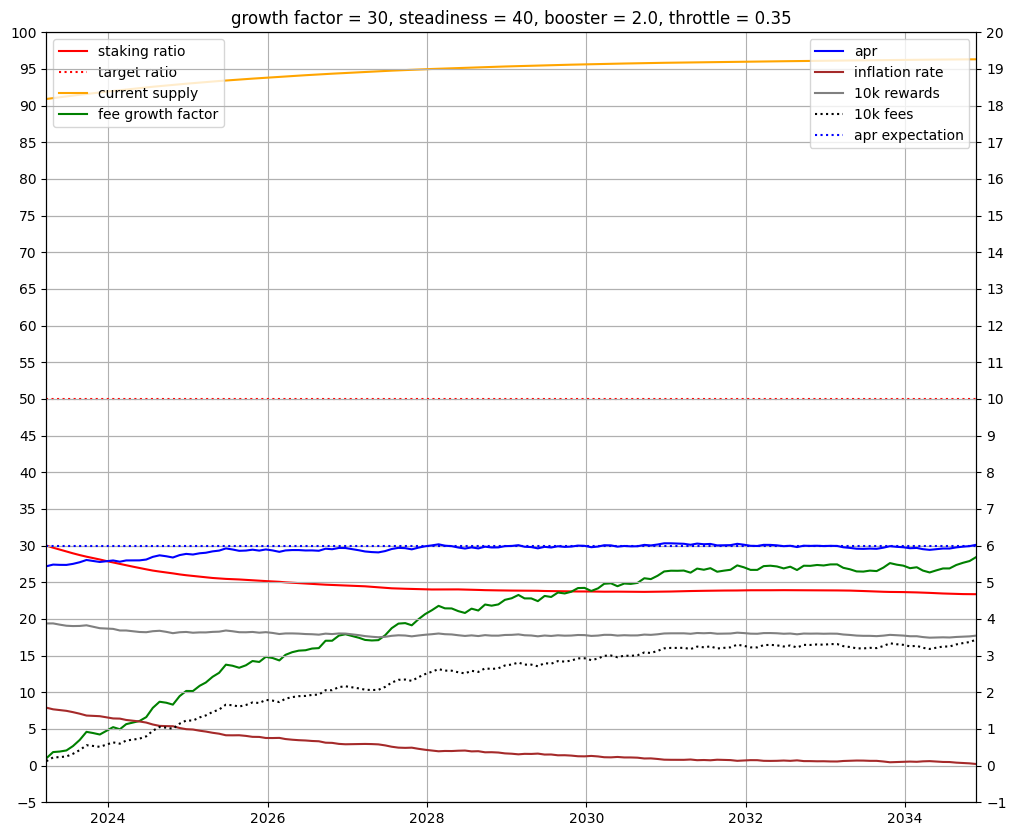

('min(apr)', 5.436210824511933, 'max(apr)', 6.3334084434078255, 'min(ratio)', 21.038550844321826, 'max(ratio)', 30.0, 'max(supply)', 96.68729475215265, 'max(factor)', 33.88000000000003, 'median(factor)', 29.673000000000016, 'median(tps)', 10.209366562500005, 'median(ratio)', 23.808133358069455, 'median(apr)', 5.9953910084773145)


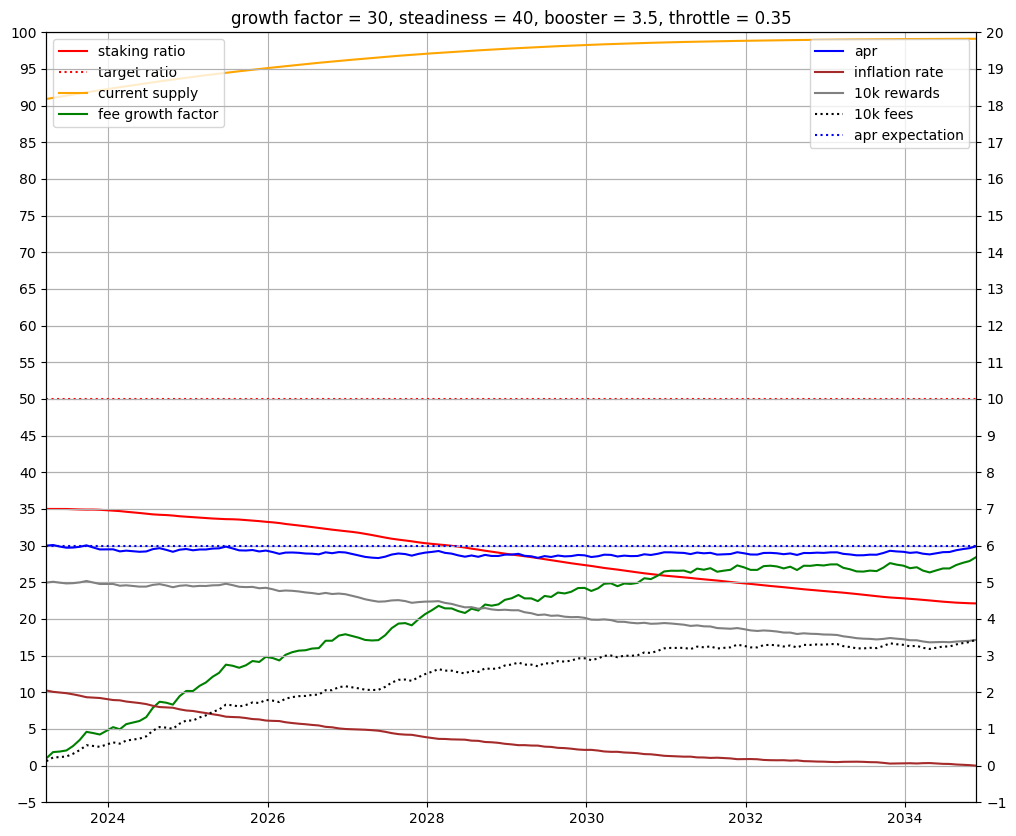

('min(apr)', 5.660557168612412, 'max(apr)', 6.371070079290072, 'min(ratio)', 20.38578317546369, 'max(ratio)', 35.00904555011238, 'max(supply)', 99.16769253013814, 'max(factor)', 33.88000000000003, 'median(factor)', 29.673000000000016, 'median(tps)', 10.209366562500005, 'median(ratio)', 23.285446604852236, 'median(apr)', 5.995061654929964)


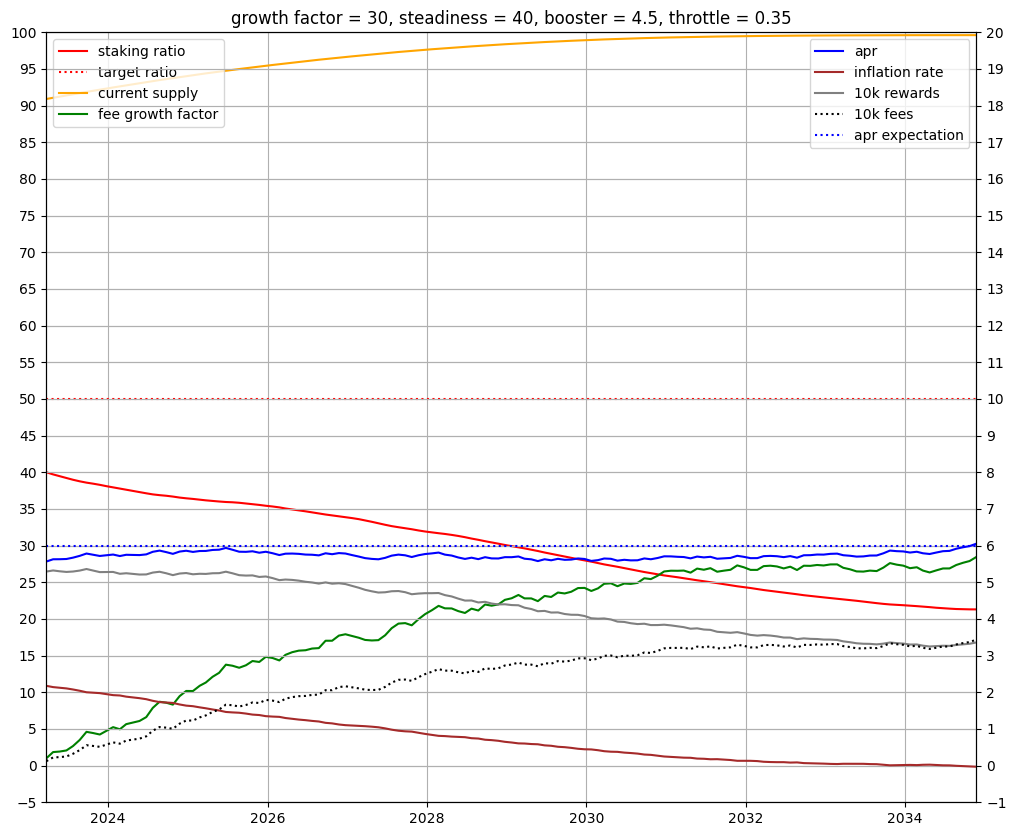

('min(apr)', 5.565789734892192, 'max(apr)', 6.39431884560564, 'min(ratio)', 20.24197884860667, 'max(ratio)', 40.0, 'max(supply)', 99.62264577318525, 'max(factor)', 33.88000000000003, 'median(factor)', 29.673000000000016, 'median(tps)', 10.209366562500005, 'median(ratio)', 23.128736323182594, 'median(apr)', 5.996817831296752)
--------------------------------------------------


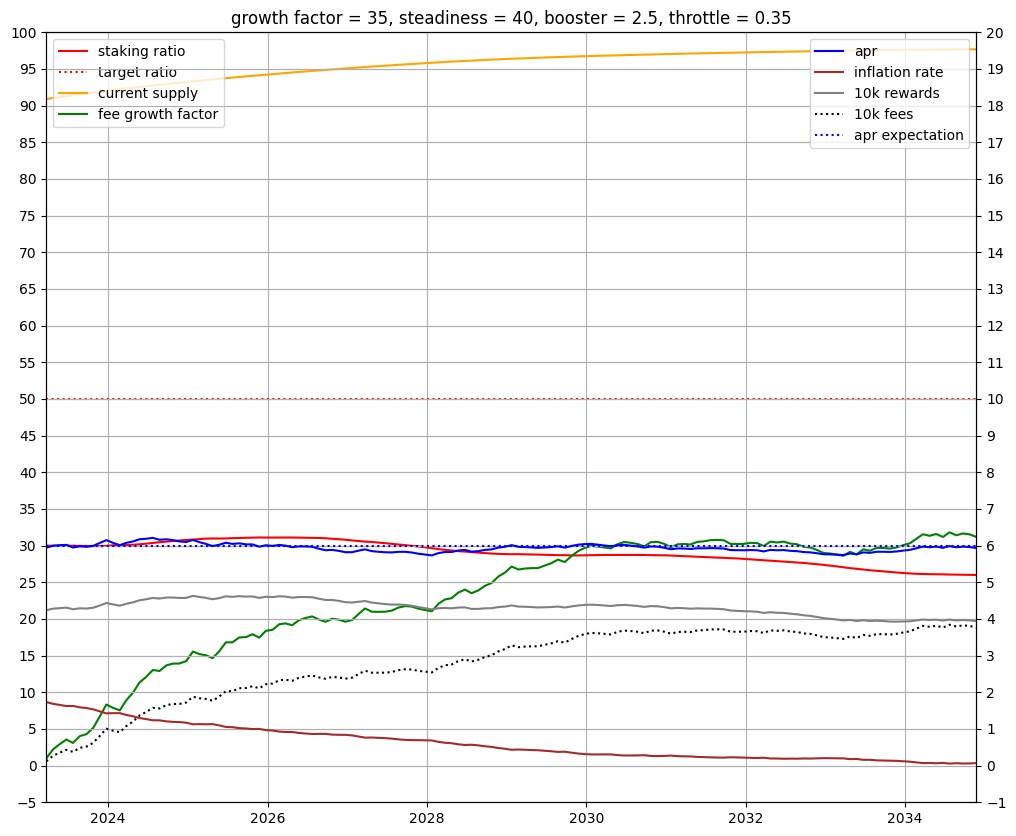

('min(apr)', 5.7328833459473785, 'max(apr)', 6.241259103179337, 'min(ratio)', 25.164086686534013, 'max(ratio)', 31.109925228928986, 'max(supply)', 97.84823799671231, 'max(factor)', 38.506999999999984, 'median(factor)', 34.644, 'median(tps)', 11.91970125, 'median(ratio)', 27.430948412055372, 'median(apr)', 5.998712991611172)


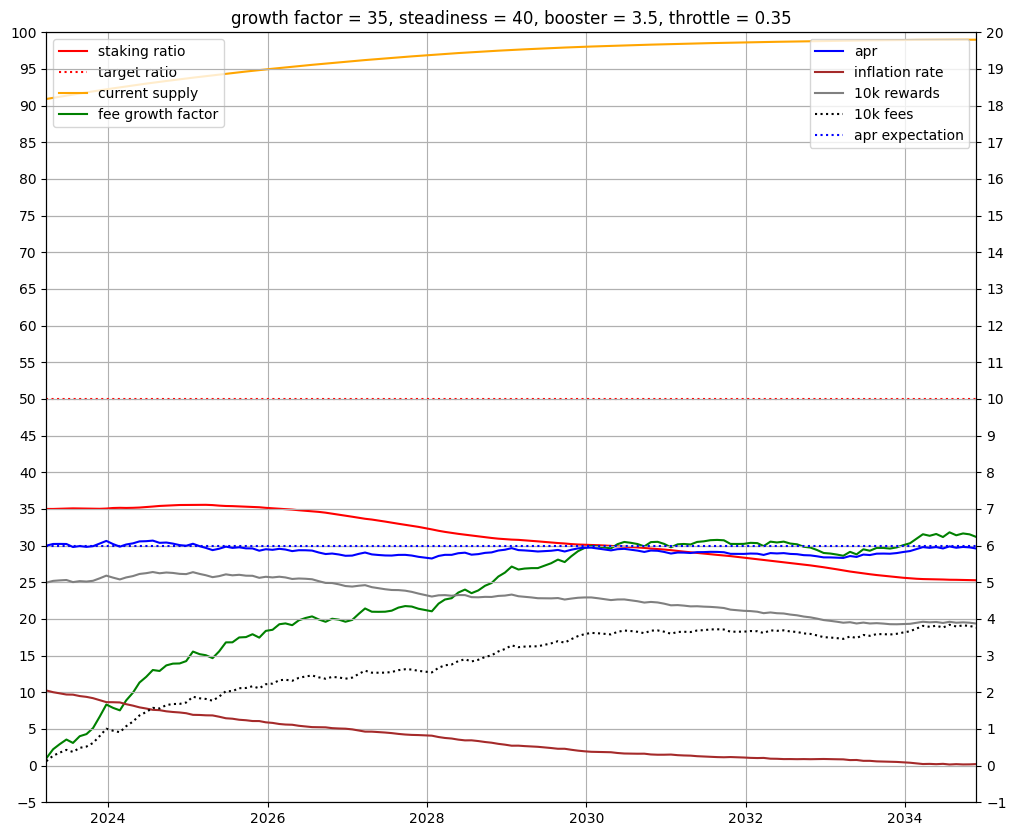

('min(apr)', 5.6485655469996425, 'max(apr)', 6.25101720427256, 'min(ratio)', 24.842577096241495, 'max(ratio)', 35.57165494534165, 'max(supply)', 99.04320334704252, 'max(factor)', 38.506999999999984, 'median(factor)', 34.644, 'median(tps)', 11.91970125, 'median(ratio)', 27.098588987068492, 'median(apr)', 5.997428092142571)


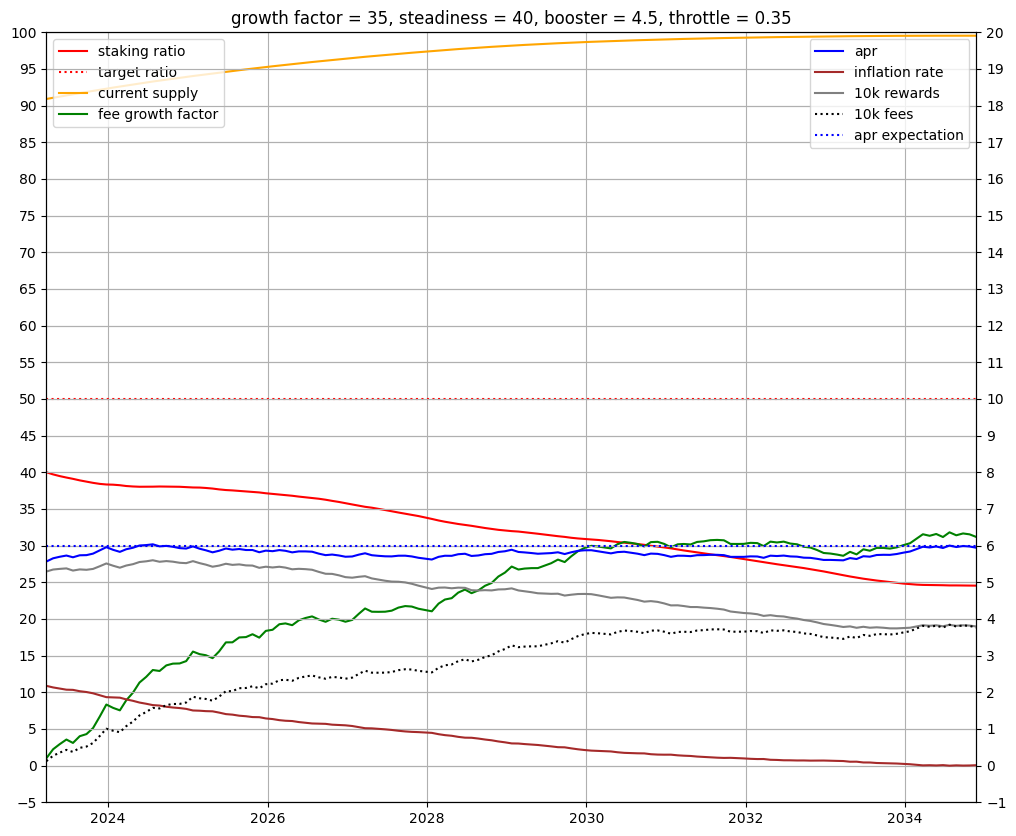

('min(apr)', 5.565789734892192, 'max(apr)', 6.270985022738741, 'min(ratio)', 24.494041336593057, 'max(ratio)', 40.0, 'max(supply)', 99.5335876365096, 'max(factor)', 38.506999999999984, 'median(factor)', 34.644, 'median(tps)', 11.91970125, 'median(ratio)', 26.96033014762617, 'median(apr)', 5.9972716810227515)
--------------------------------------------------


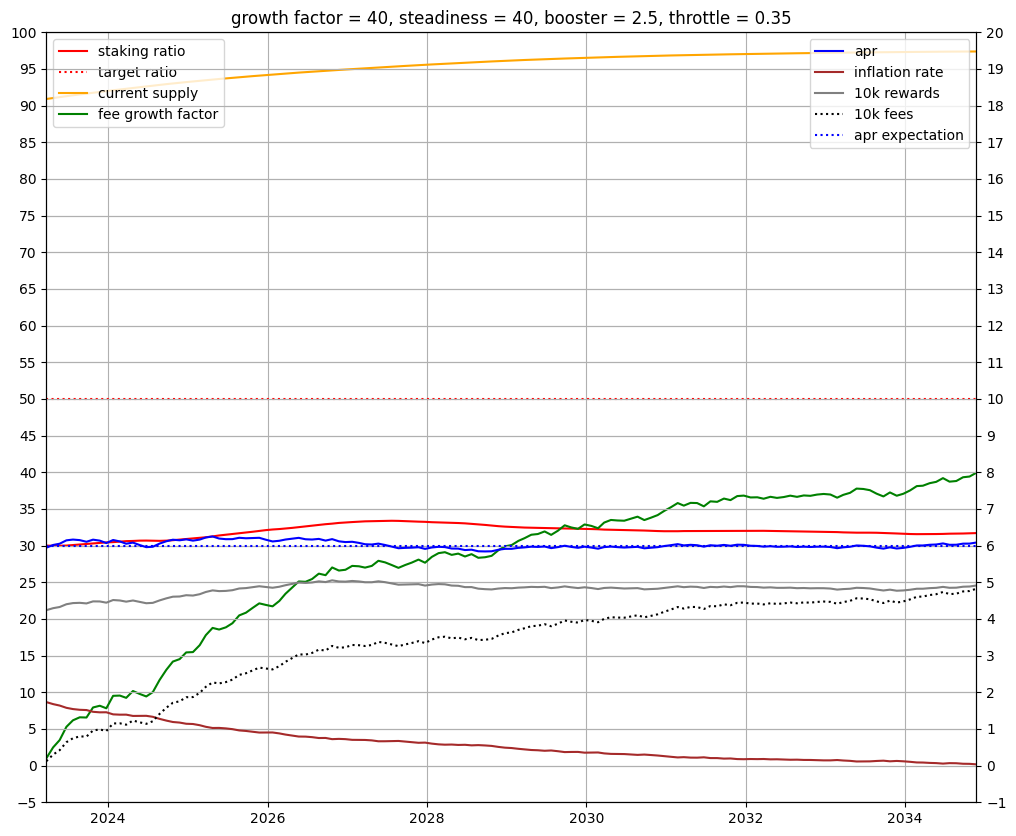

('min(apr)', 5.819899118681841, 'max(apr)', 6.249876951166338, 'min(ratio)', 29.83619055706769, 'max(ratio)', 33.75402290135166, 'max(supply)', 97.6757755404738, 'max(factor)', 43.55399999999995, 'median(factor)', 40.26900000000001, 'median(tps)', 13.855052812500004, 'median(ratio)', 31.90599113577322, 'median(apr)', 6.003324700912509)


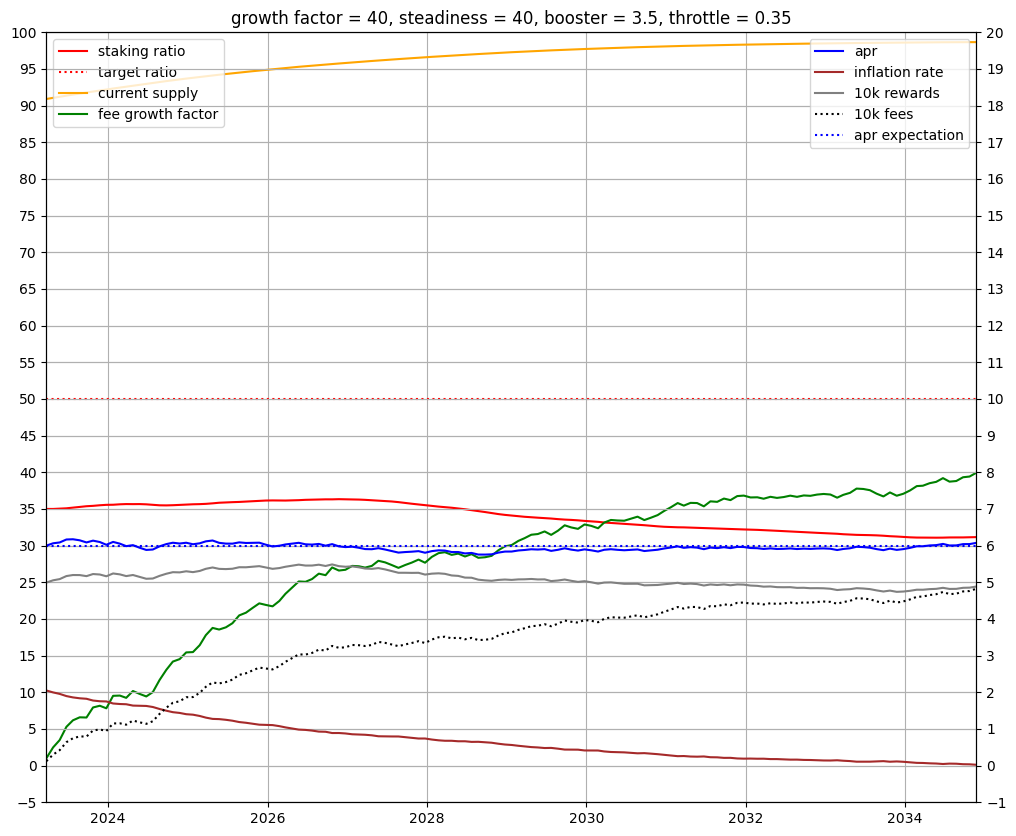

('min(apr)', 5.755059117400191, 'max(apr)', 6.176922441244804, 'min(ratio)', 29.485011955067577, 'max(ratio)', 36.332075900191185, 'max(supply)', 98.8356055575342, 'max(factor)', 43.55399999999995, 'median(factor)', 40.26900000000001, 'median(tps)', 13.855052812500004, 'median(ratio)', 31.54646519373241, 'median(apr)', 6.001489874641258)


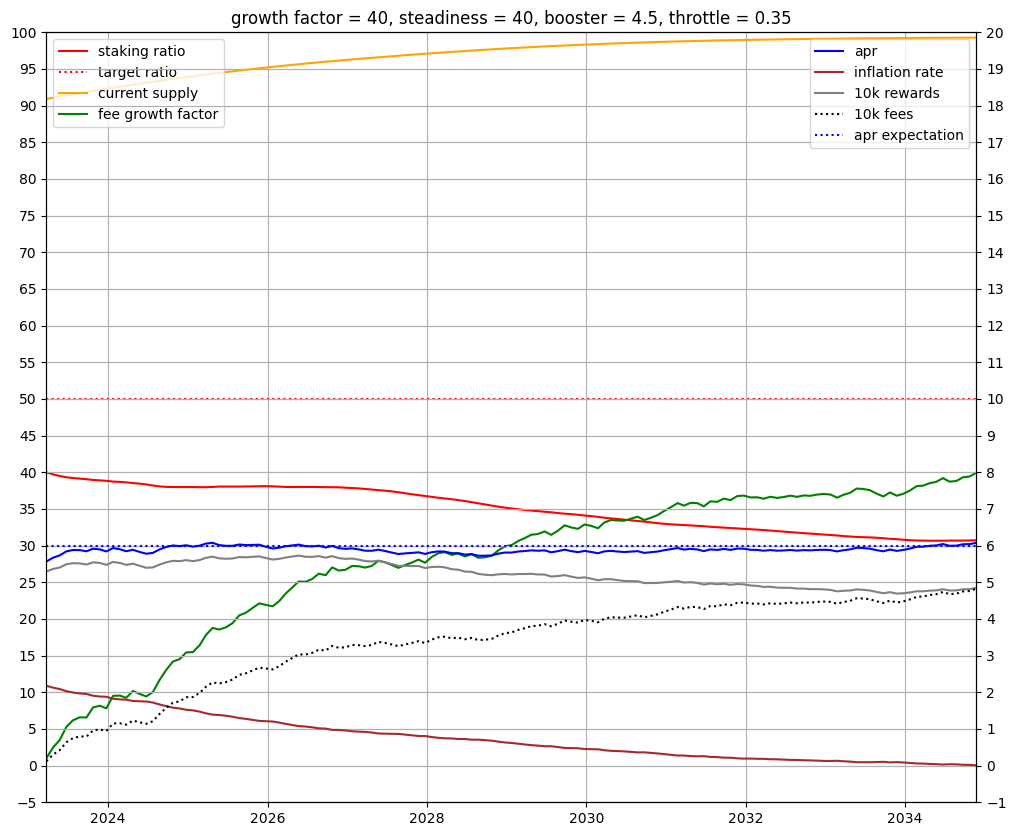

('min(apr)', 5.565789734892192, 'max(apr)', 6.18418845769024, 'min(ratio)', 29.26646864478891, 'max(ratio)', 40.0, 'max(supply)', 99.36844527178243, 'max(factor)', 43.55399999999995, 'median(factor)', 40.26900000000001, 'median(tps)', 13.855052812500004, 'median(ratio)', 31.347446777924745, 'median(apr)', 5.99939425480886)
--------------------------------------------------


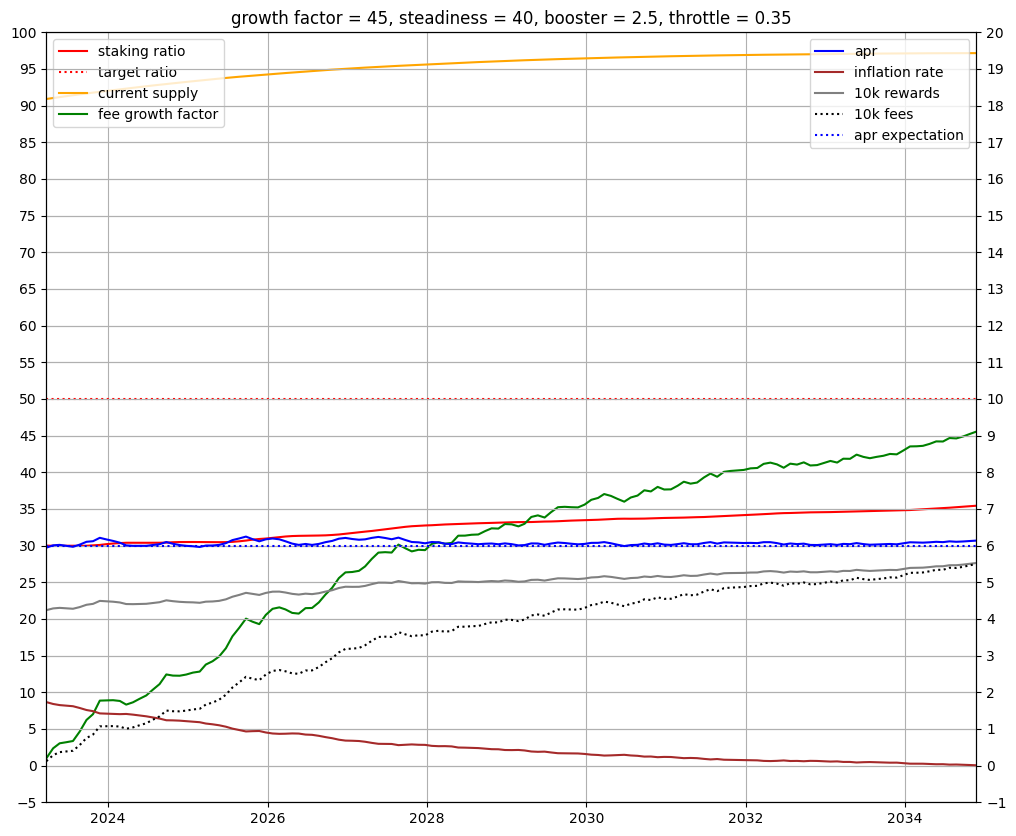

('min(apr)', 5.881603614050785, 'max(apr)', 6.245541254489134, 'min(ratio)', 29.96616733695999, 'max(ratio)', 38.14627090411929, 'max(supply)', 97.45549096447286, 'max(factor)', 49.35500000000001, 'median(factor)', 45.04899999999998, 'median(tps)', 15.499671562499993, 'median(ratio)', 35.63905852895383, 'median(apr)', 6.003324157283183)


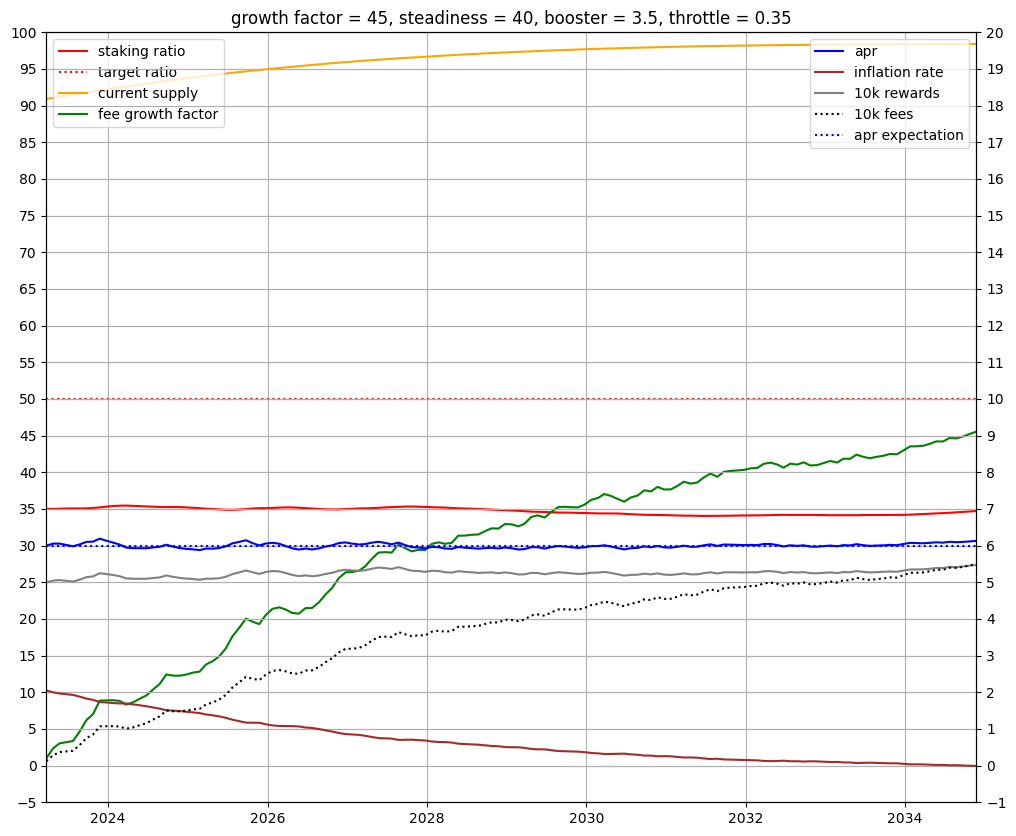

('min(apr)', 5.8738353299441695, 'max(apr)', 6.189598588317917, 'min(ratio)', 33.402160829864336, 'max(ratio)', 37.5363918074475, 'max(supply)', 98.5731456859419, 'max(factor)', 49.35500000000001, 'median(factor)', 45.04899999999998, 'median(tps)', 15.499671562499993, 'median(ratio)', 35.243824057203454, 'median(apr)', 6.0003222535140655)


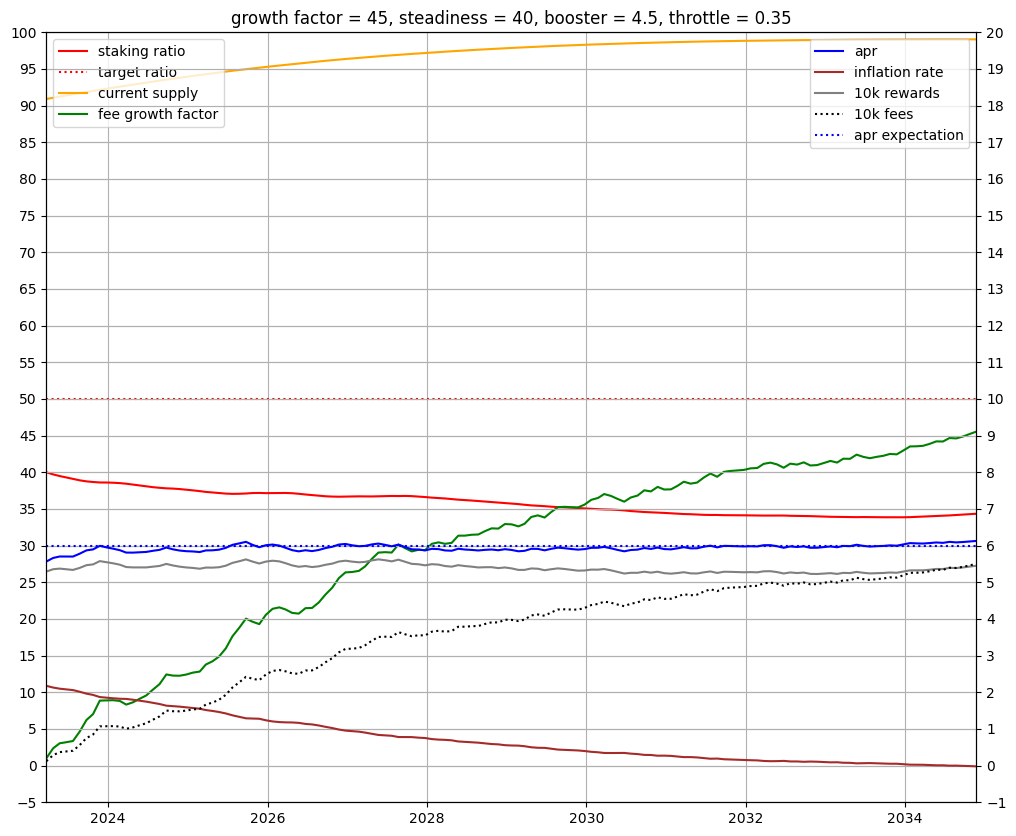

('min(apr)', 5.565789734892192, 'max(apr)', 6.179908505693507, 'min(ratio)', 33.18360723963141, 'max(ratio)', 40.0, 'max(supply)', 99.1392086175415, 'max(factor)', 49.35500000000001, 'median(factor)', 45.04899999999998, 'median(tps)', 15.499671562499993, 'median(ratio)', 35.09312602107415, 'median(apr)', 5.998431062124083)
--------------------------------------------------


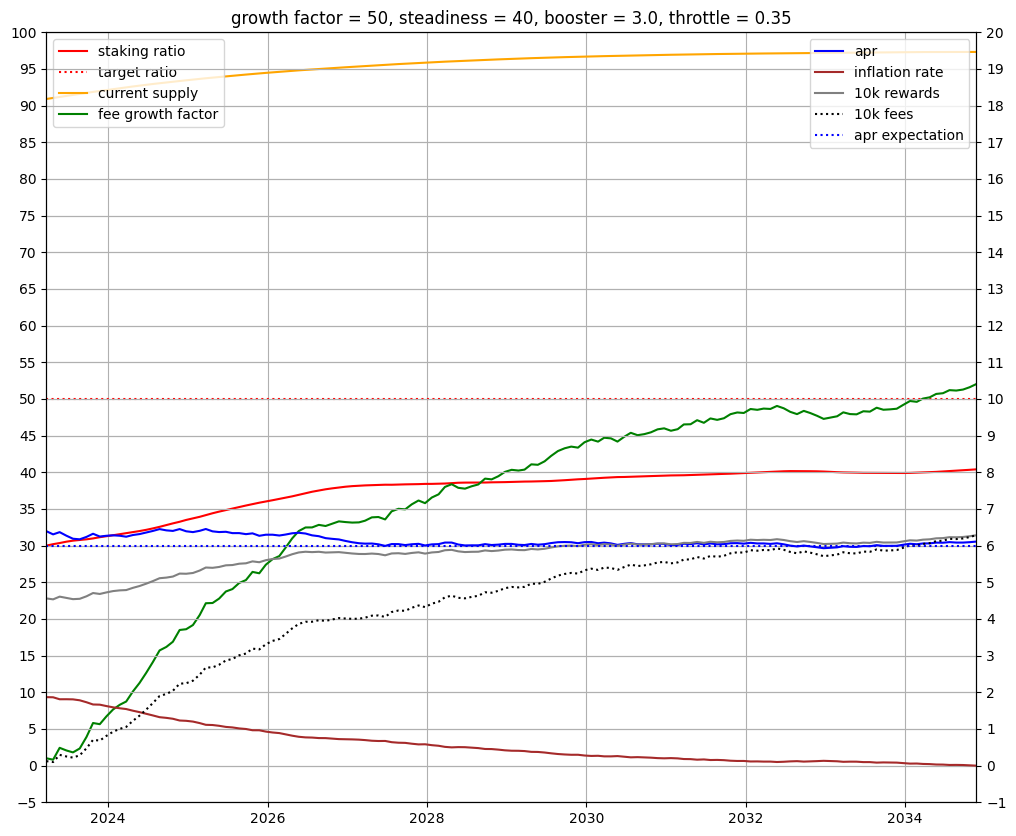

('min(apr)', 5.847049155022669, 'max(apr)', 6.452701617188033, 'min(ratio)', 30.0, 'max(ratio)', 41.15695964126005, 'max(supply)', 97.7516444146702, 'max(factor)', 53.22499999999998, 'median(factor)', 49.710000000000015, 'median(tps)', 17.103346875000003, 'median(ratio)', 39.281509511172096, 'median(apr)', 6.0036185008149205)


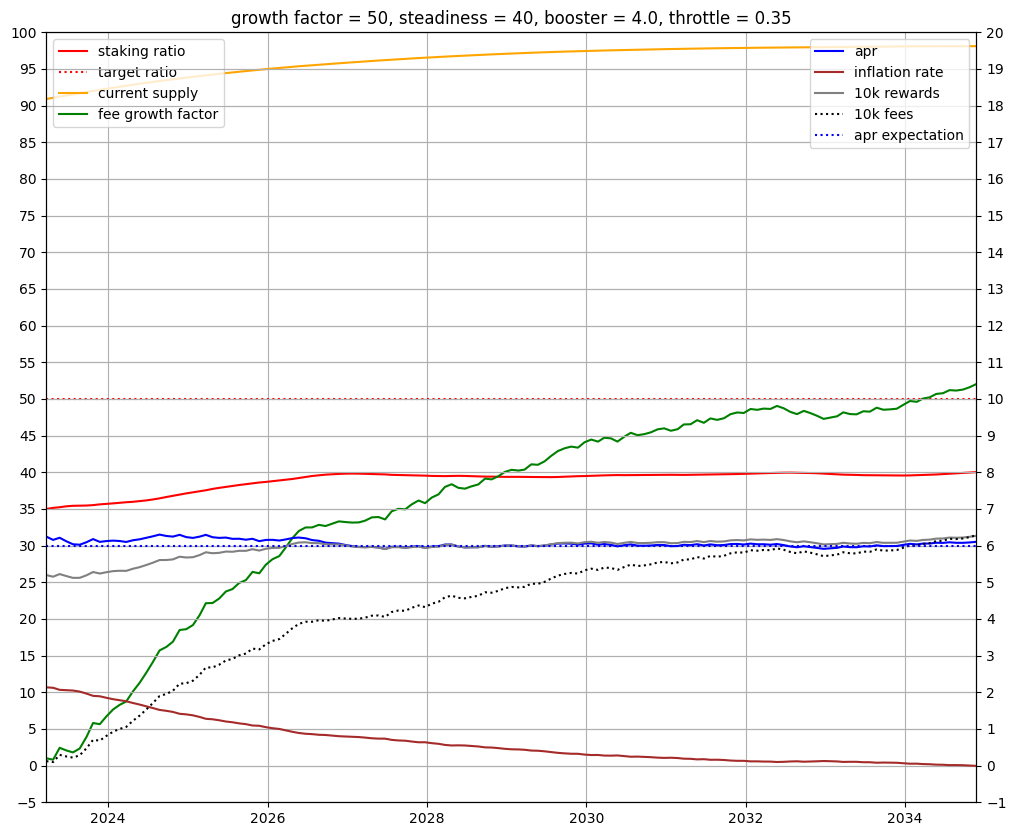

('min(apr)', 5.854861849646191, 'max(apr)', 6.30052846347706, 'min(ratio)', 35.0, 'max(ratio)', 40.80018742505643, 'max(supply)', 98.50711190443712, 'max(factor)', 53.22499999999998, 'median(factor)', 49.710000000000015, 'median(tps)', 17.103346875000003, 'median(ratio)', 39.01845381068998, 'median(apr)', 6.002320335703069)


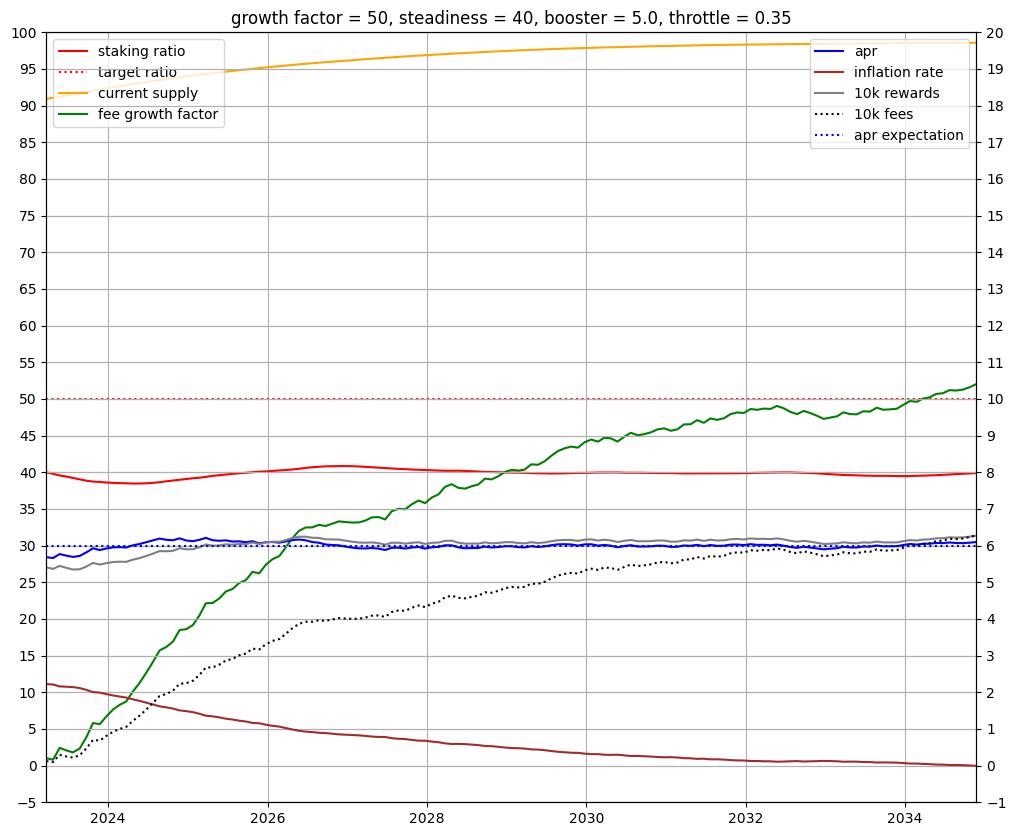

('min(apr)', 5.6619930586525, 'max(apr)', 6.210963725085951, 'min(ratio)', 36.887858518413935, 'max(ratio)', 40.84690234534338, 'max(supply)', 98.9617037374896, 'max(factor)', 53.22499999999998, 'median(factor)', 49.710000000000015, 'median(tps)', 17.103346875000003, 'median(ratio)', 38.85955398589013, 'median(apr)', 6.0005666169918594)
--------------------------------------------------


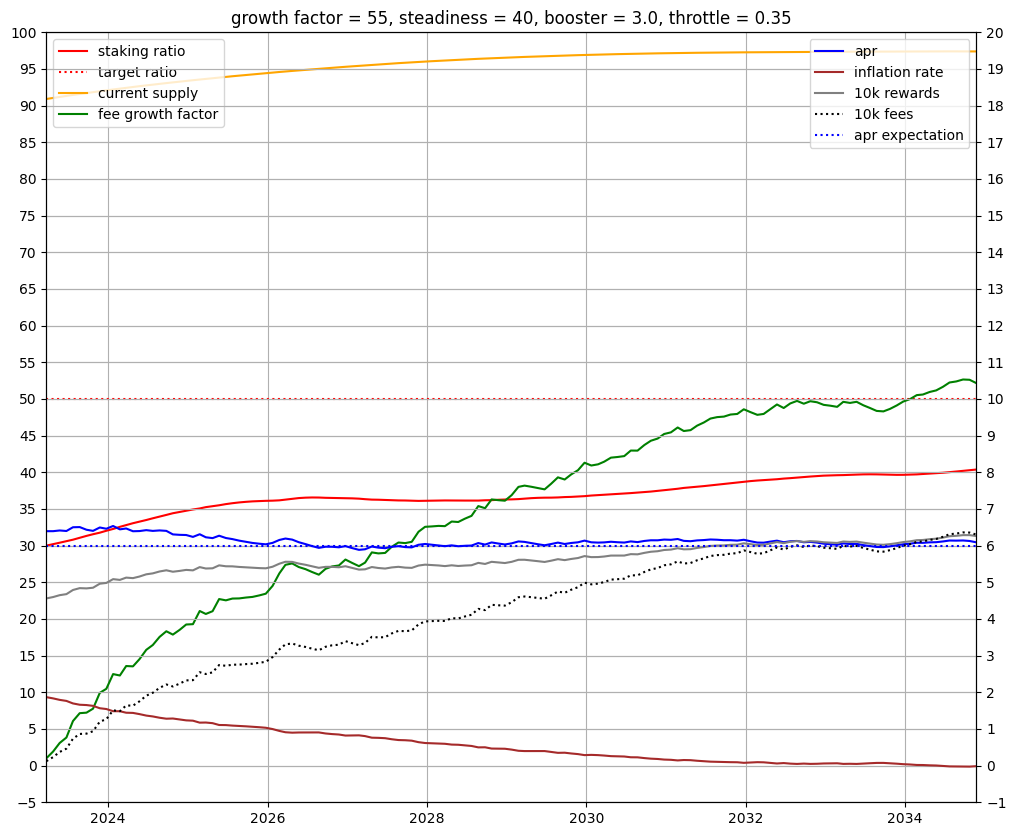

('min(apr)', 5.855498886298022, 'max(apr)', 6.535553198530988, 'min(ratio)', 30.0, 'max(ratio)', 45.43227309329984, 'max(supply)', 97.39705644001118, 'max(factor)', 58.35400000000005, 'median(factor)', 54.58600000000002, 'median(tps)', 18.780995625000006, 'median(ratio)', 43.28308650945605, 'median(apr)', 6.005571632770097)


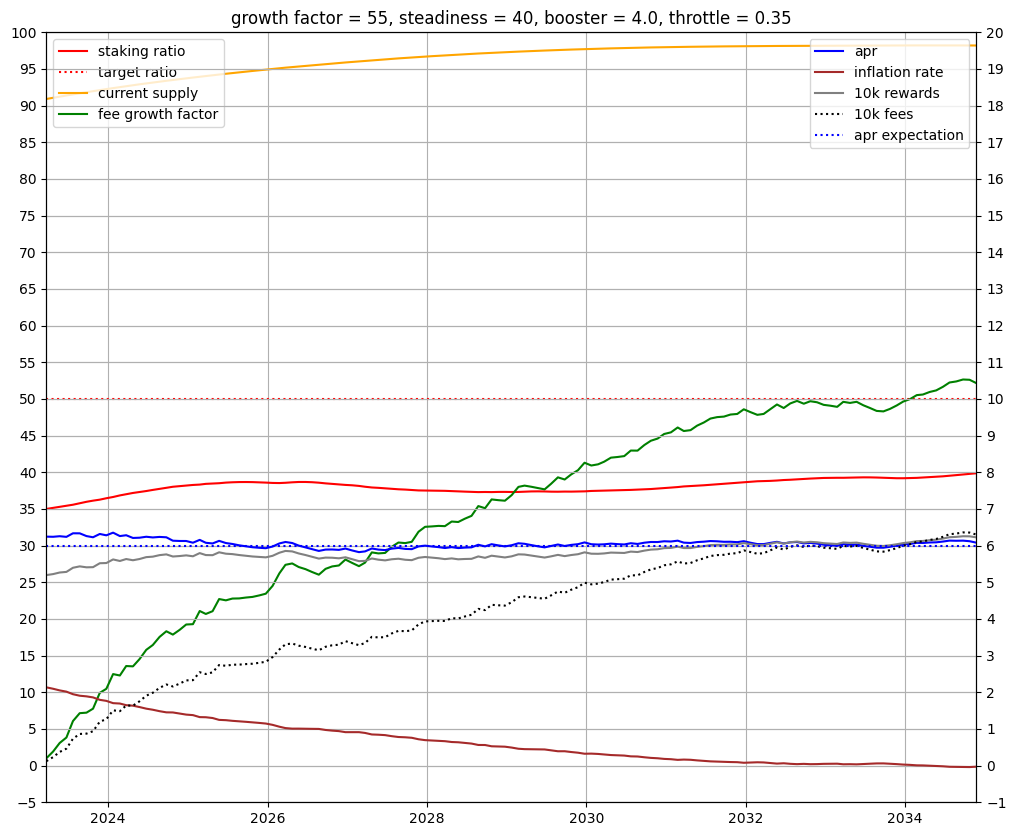

('min(apr)', 5.821755077086752, 'max(apr)', 6.353436182499192, 'min(ratio)', 35.0, 'max(ratio)', 45.0274943169189, 'max(supply)', 98.21235942983989, 'max(factor)', 58.35400000000005, 'median(factor)', 54.58600000000002, 'median(tps)', 18.780995625000006, 'median(ratio)', 43.03231698192489, 'median(apr)', 6.00520247092667)


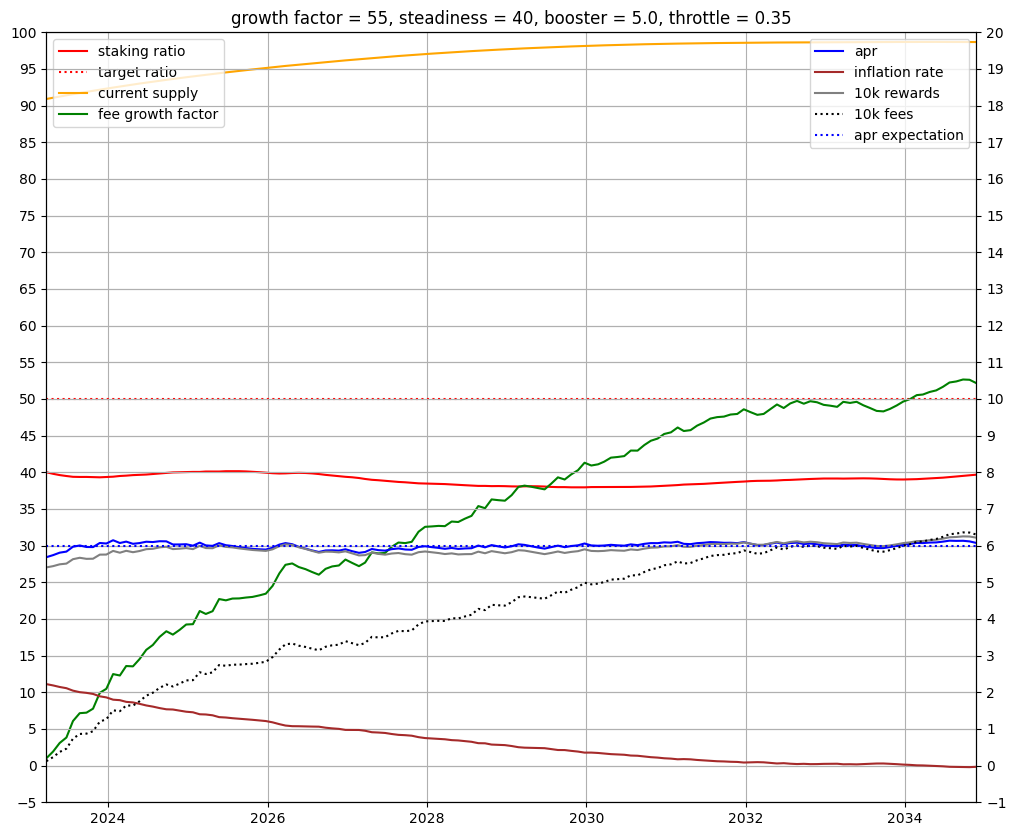

('min(apr)', 5.684317054334494, 'max(apr)', 6.146581873590467, 'min(ratio)', 37.941525892748786, 'max(ratio)', 44.778487311568355, 'max(supply)', 98.68337052186357, 'max(factor)', 58.35400000000005, 'median(factor)', 54.58600000000002, 'median(tps)', 18.780995625000006, 'median(ratio)', 42.85611036330599, 'median(apr)', 6.004198043559943)
--------------------------------------------------


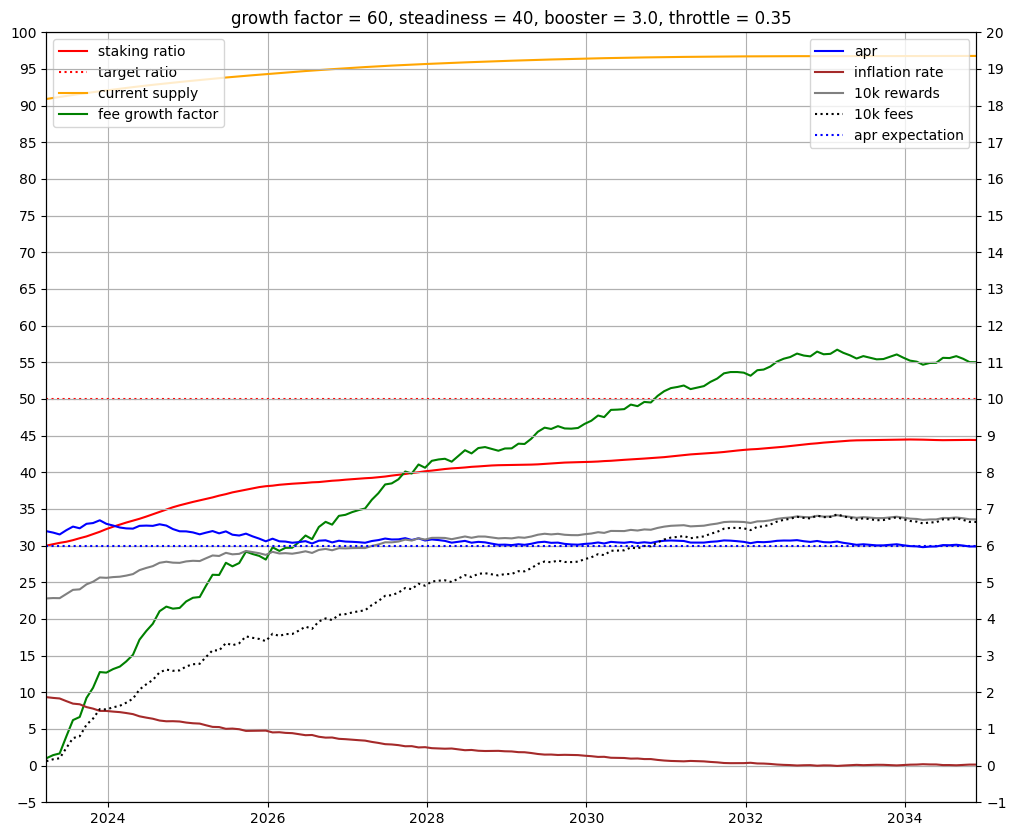

('min(apr)', 5.891398429535278, 'max(apr)', 6.690578298864006, 'min(ratio)', 30.0, 'max(ratio)', 49.70632326511564, 'max(supply)', 96.78992605668113, 'max(factor)', 63.32400000000014, 'median(factor)', 60.338, 'median(tps)', 20.760043125, 'median(ratio)', 48.345073000286845, 'median(apr)', 6.004999116131284)


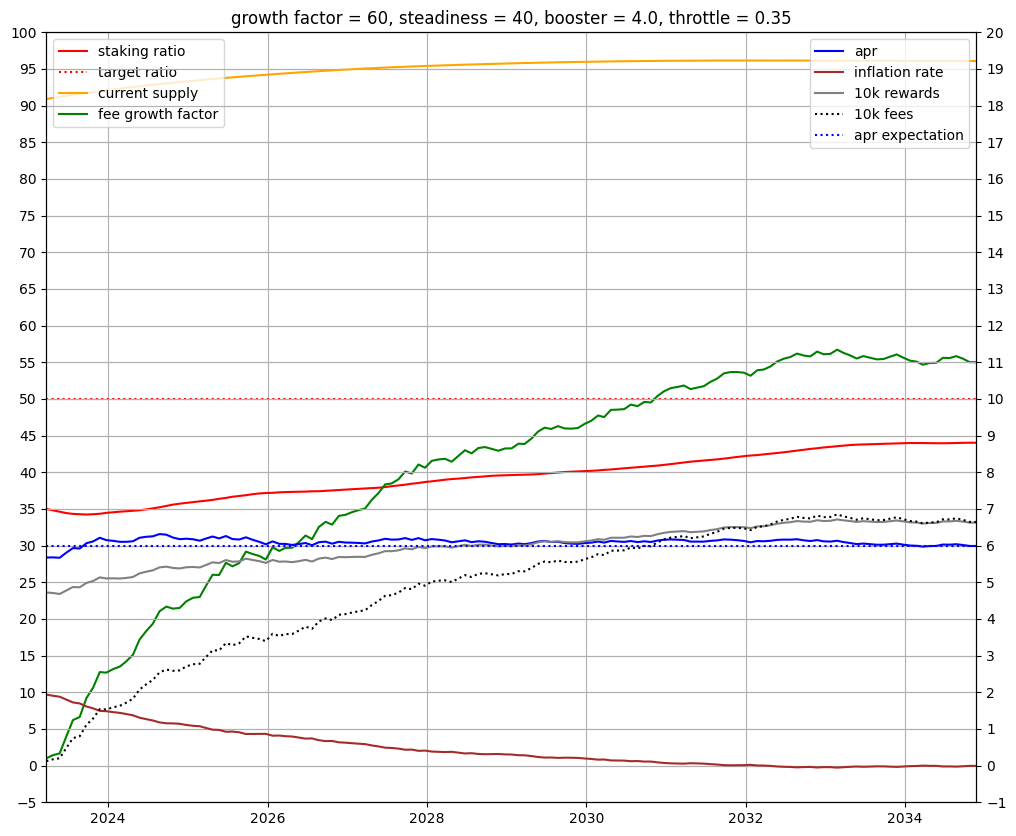

('min(apr)', 5.668516650974544, 'max(apr)', 6.3147333395451515, 'min(ratio)', 34.24000135438807, 'max(ratio)', 50.0, 'max(supply)', 96.153809965914, 'max(factor)', 63.32400000000014, 'median(factor)', 60.338, 'median(tps)', 20.760043125, 'median(ratio)', 48.8014192751926, 'median(apr)', 6.005667983100792)


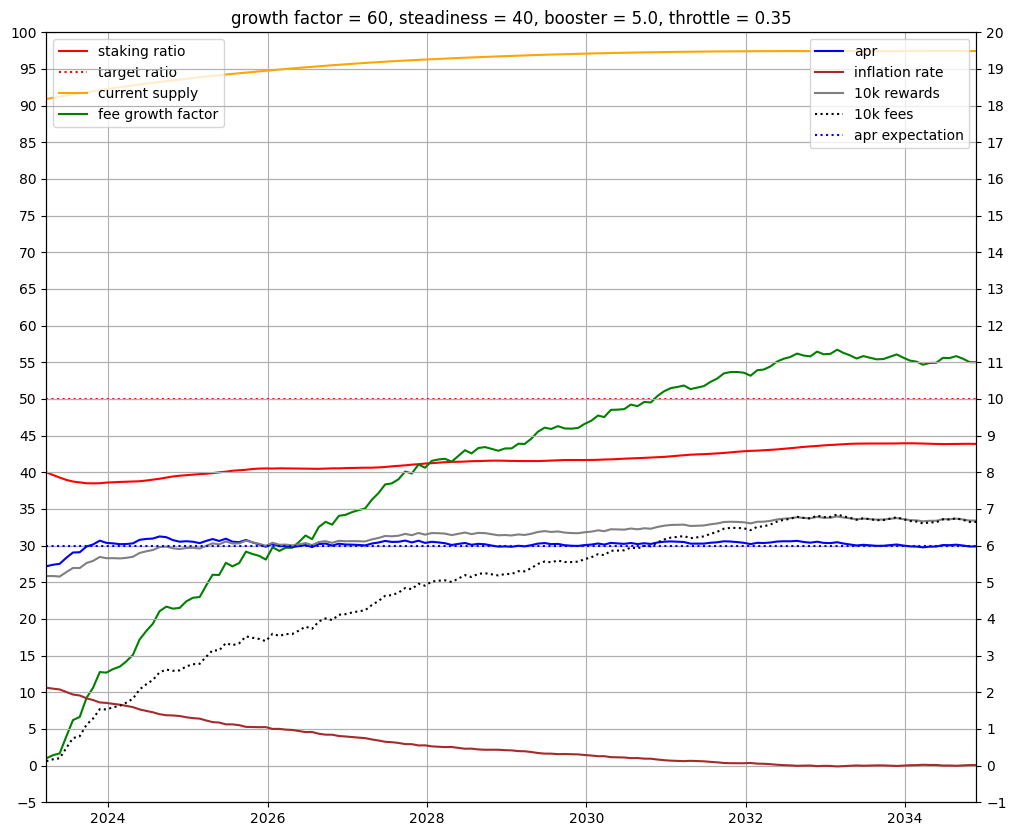

('min(apr)', 5.436210824511934, 'max(apr)', 6.249999689656189, 'min(ratio)', 38.486713538942325, 'max(ratio)', 49.53615166695021, 'max(supply)', 97.4492681118629, 'max(factor)', 63.32400000000014, 'median(factor)', 60.338, 'median(tps)', 20.760043125, 'median(ratio)', 48.21766802791422, 'median(apr)', 6.004096379715587)
--------------------------------------------------


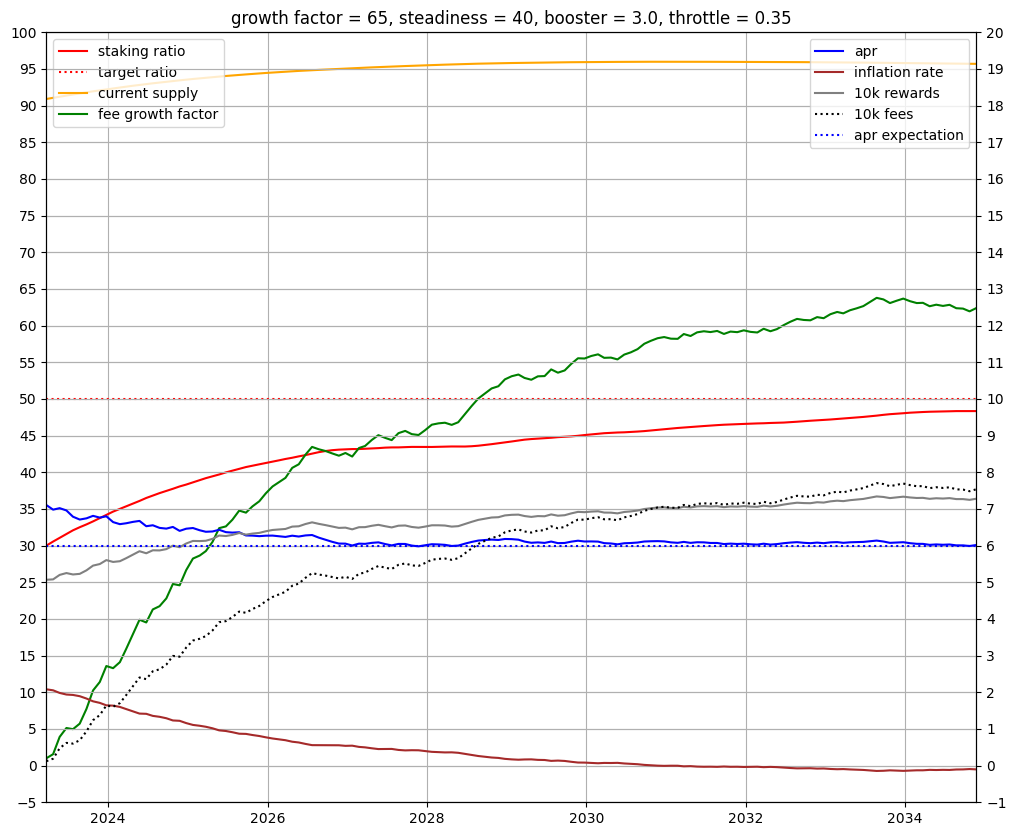

('min(apr)', 5.9436495846092745, 'max(apr)', 7.106254098187888, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 95.98154068253513, 'max(factor)', 67.9709999999999, 'median(factor)', 64.3999999999999, 'median(tps)', 22.157624999999967, 'median(ratio)', 50.0, 'median(apr)', 6.304103146831422)


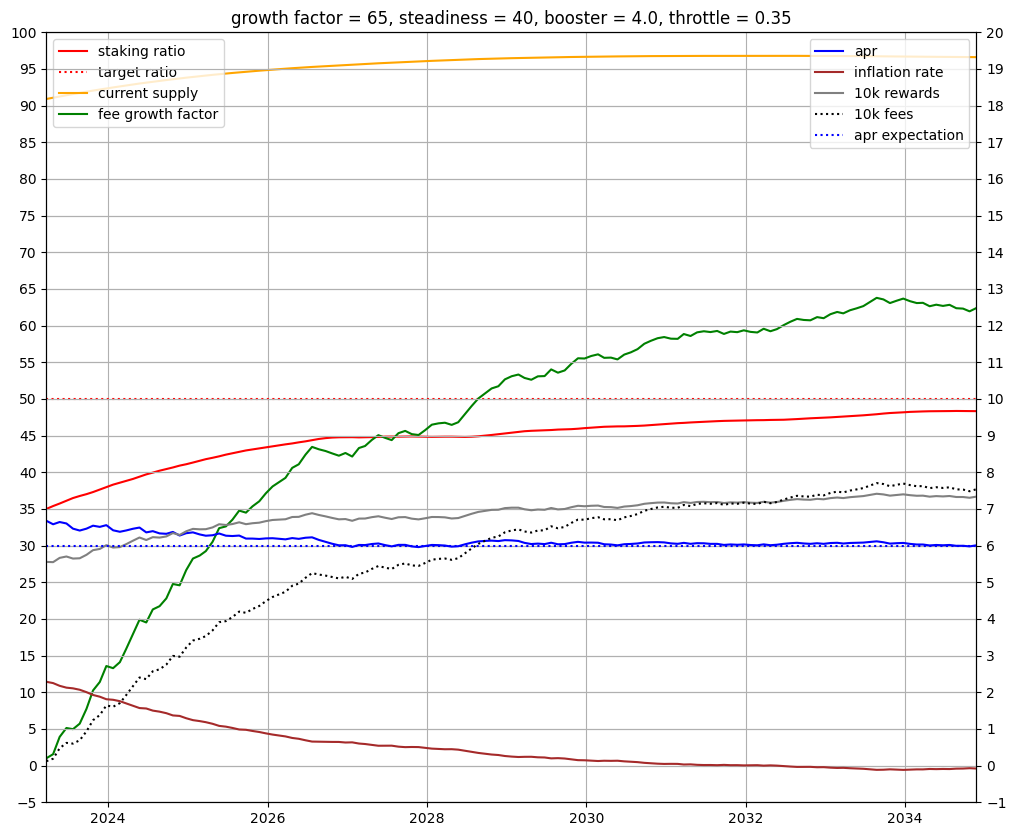

('min(apr)', 5.939800245902265, 'max(apr)', 6.676906490539584, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 96.78867083409598, 'max(factor)', 67.9709999999999, 'median(factor)', 64.3999999999999, 'median(tps)', 22.157624999999967, 'median(ratio)', 50.0, 'median(apr)', 6.249358798584217)


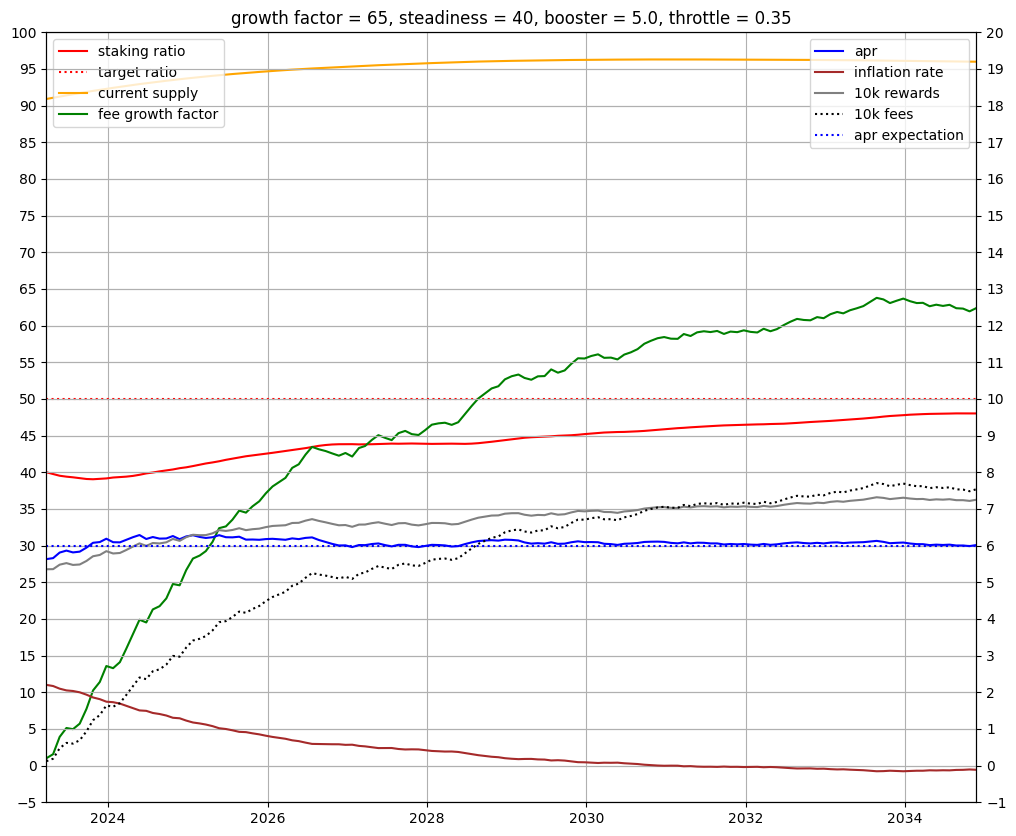

('min(apr)', 5.631326872058438, 'max(apr)', 6.539644531692127, 'min(ratio)', 39.04907746082658, 'max(ratio)', 50.0, 'max(supply)', 96.29376425840714, 'max(factor)', 67.9709999999999, 'median(factor)', 64.3999999999999, 'median(tps)', 22.157624999999967, 'median(ratio)', 50.0, 'median(apr)', 6.2999479693093825)
--------------------------------------------------


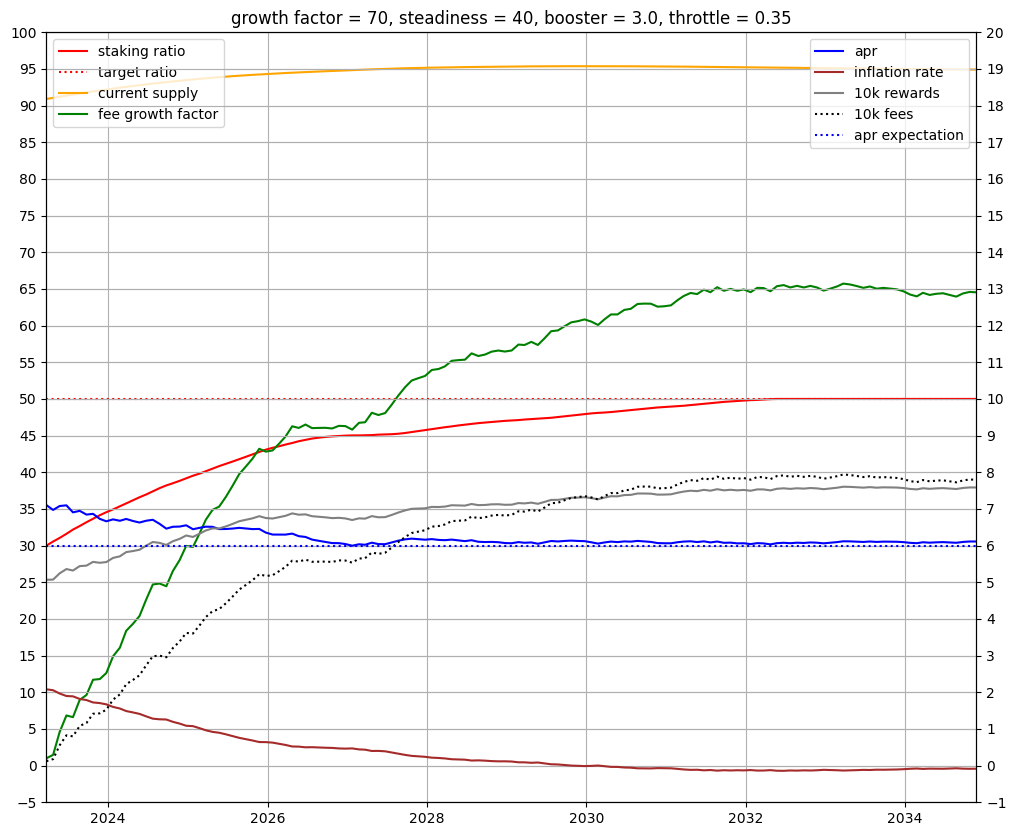

('min(apr)', 5.9972869214097955, 'max(apr)', 7.356925081216345, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 95.37556625227427, 'max(factor)', 75.11600000000043, 'median(factor)', 69.9640000000003, 'median(tps)', 24.071988750000102, 'median(ratio)', 50.0, 'median(apr)', 6.925413491074691)


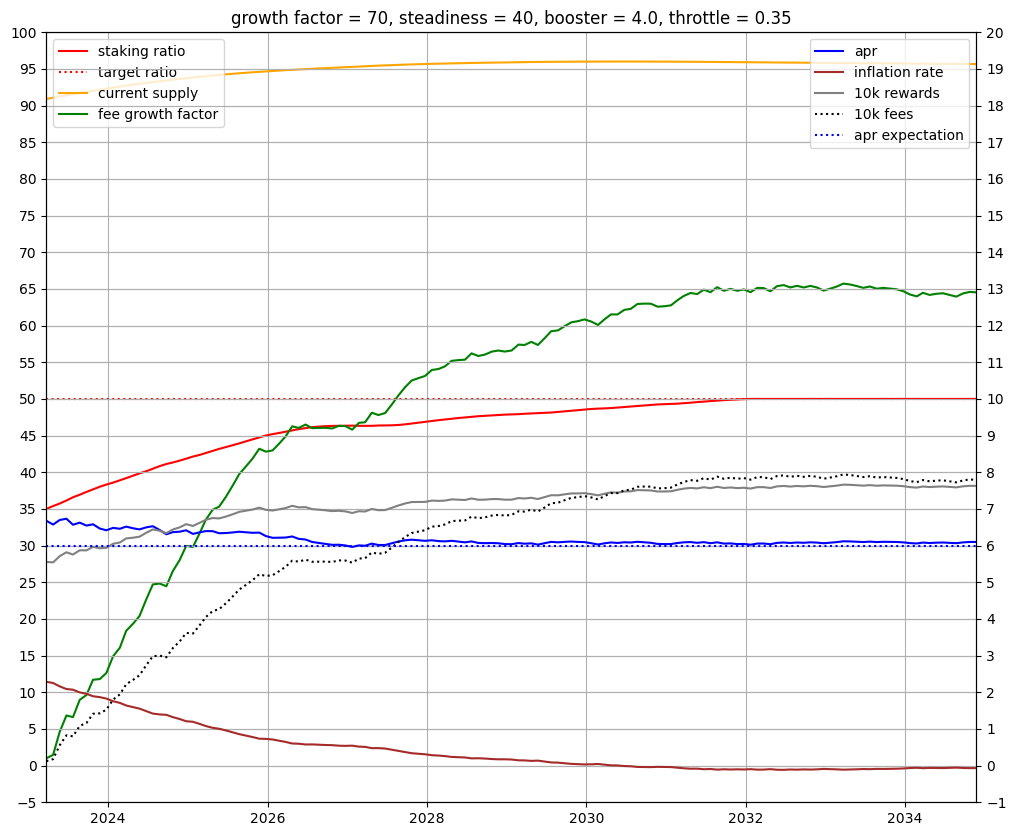

('min(apr)', 5.963891533677321, 'max(apr)', 7.295732165703957, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 96.01157610956054, 'max(factor)', 75.11600000000043, 'median(factor)', 69.9640000000003, 'median(tps)', 24.071988750000102, 'median(ratio)', 50.0, 'median(apr)', 6.868214066378541)


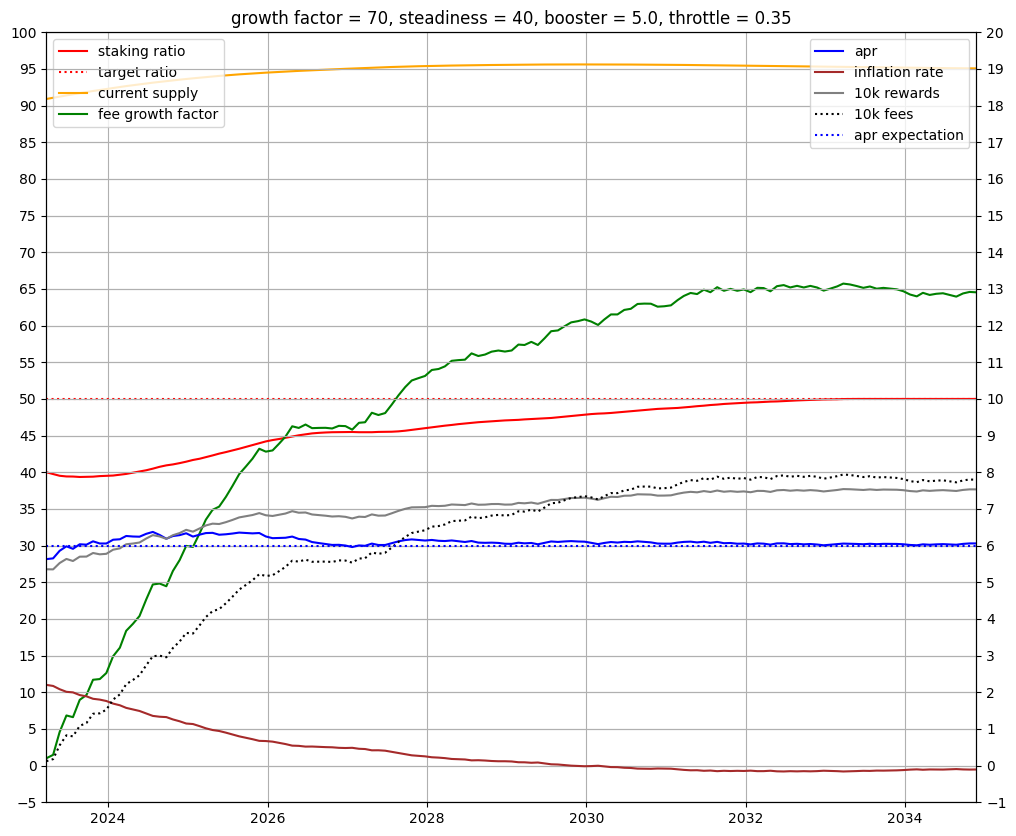

('min(apr)', 5.631326872058438, 'max(apr)', 7.3569250742892685, 'min(ratio)', 39.36050949233073, 'max(ratio)', 50.0, 'max(supply)', 95.61497302250709, 'max(factor)', 75.11600000000043, 'median(factor)', 69.9640000000003, 'median(tps)', 24.071988750000102, 'median(ratio)', 50.0, 'median(apr)', 6.92379035444187)
--------------------------------------------------


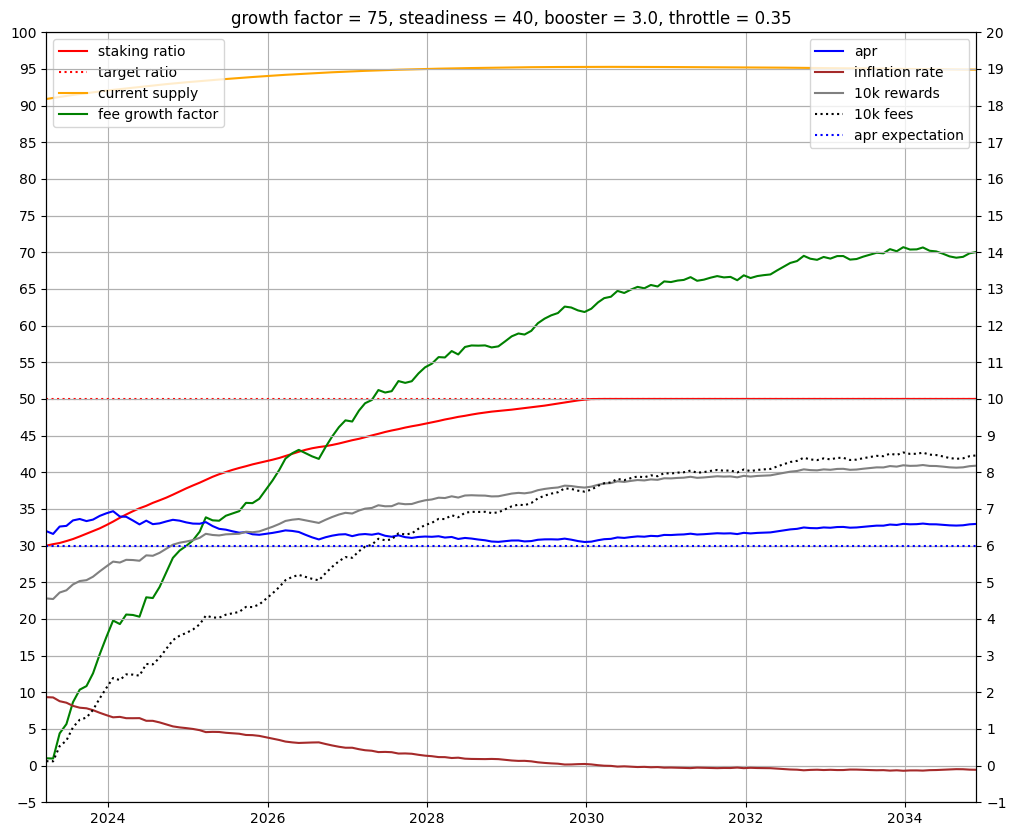

('min(apr)', 6.098734668554485, 'max(apr)', 7.727325584376752, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 95.28424581296032, 'max(factor)', 78.45900000000015, 'median(factor)', 74.39200000000008, 'median(tps)', 25.59549750000003, 'median(ratio)', 50.0, 'median(apr)', 7.39650931553304)


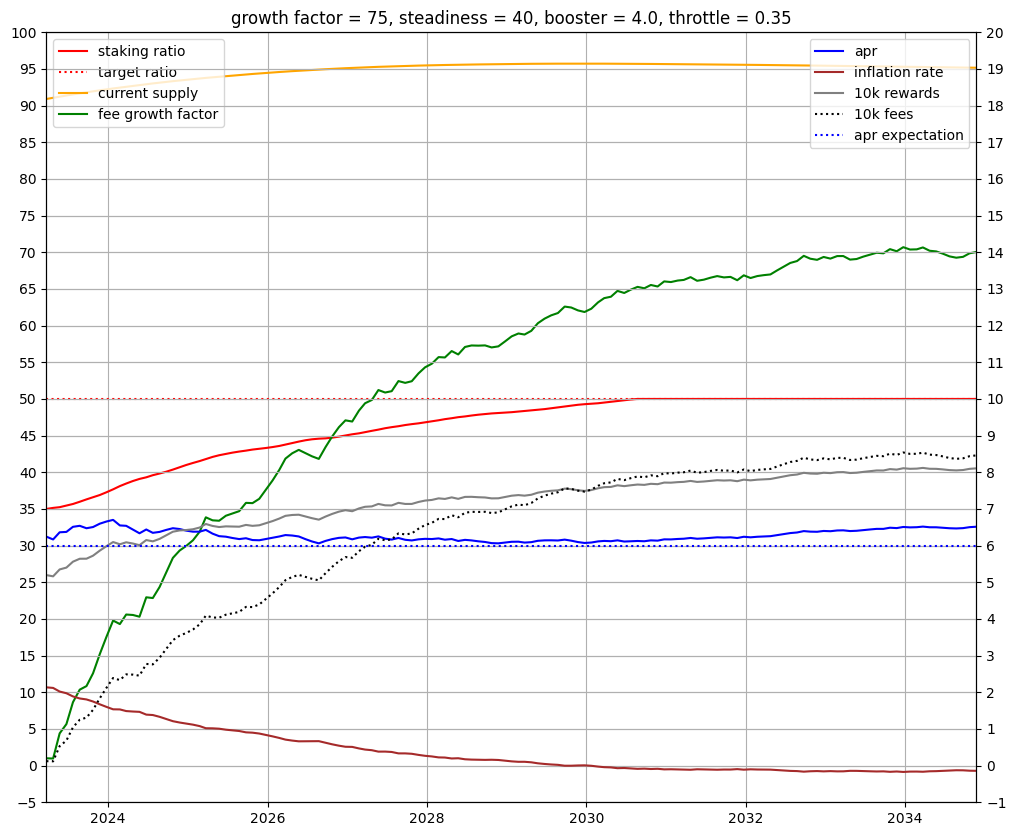

('min(apr)', 6.0618419195475575, 'max(apr)', 7.727325500093858, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 95.72182441419011, 'max(factor)', 78.45900000000015, 'median(factor)', 74.39200000000008, 'median(tps)', 25.59549750000003, 'median(ratio)', 50.0, 'median(apr)', 7.396379973426784)


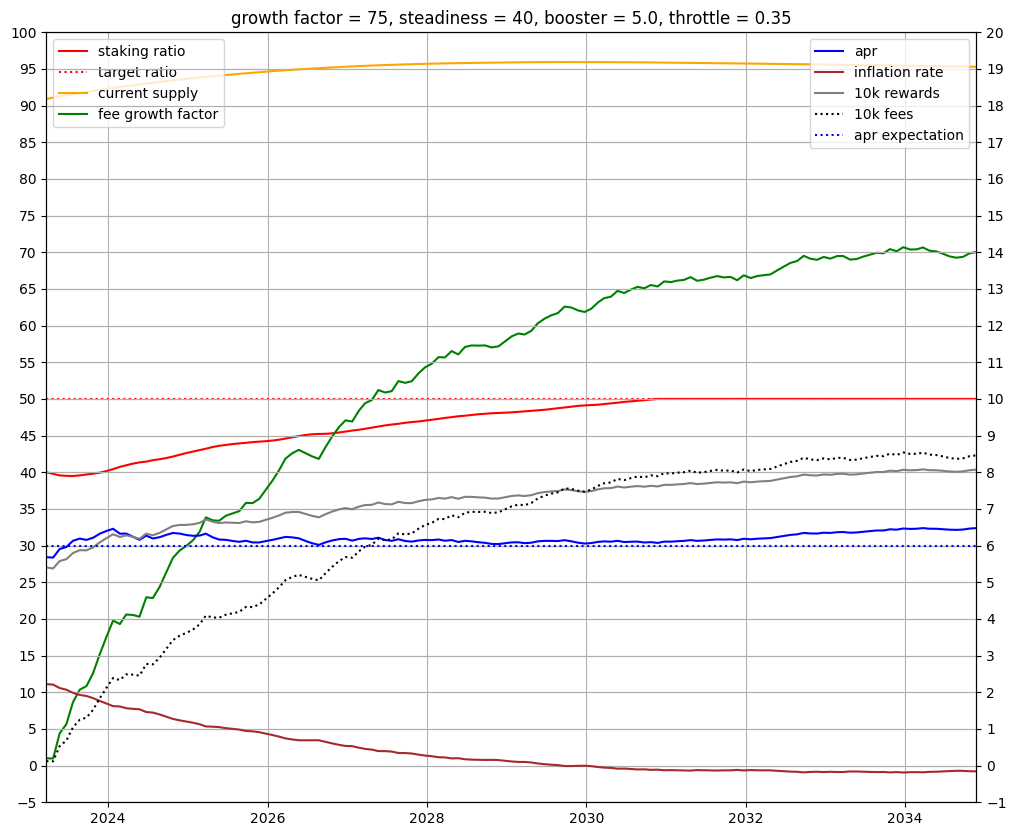

('min(apr)', 5.673124872180614, 'max(apr)', 7.727325459775786, 'min(ratio)', 39.48757043923152, 'max(ratio)', 50.0, 'max(supply)', 95.93821870334433, 'max(factor)', 78.45900000000015, 'median(factor)', 74.39200000000008, 'median(tps)', 25.59549750000003, 'median(ratio)', 50.0, 'median(apr)', 7.396111722204802)
--------------------------------------------------


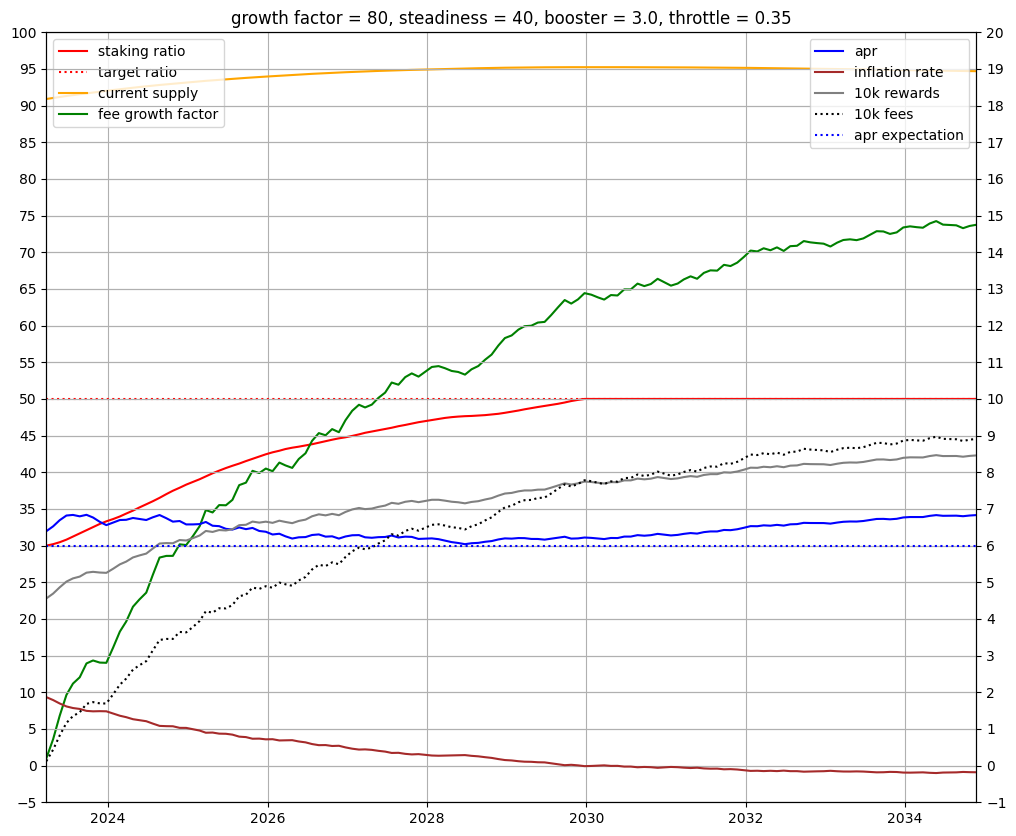

('min(apr)', 6.038836682395257, 'max(apr)', 8.412809264916664, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 95.24182186766348, 'max(factor)', 84.22900000000013, 'median(factor)', 80.1840000000001, 'median(tps)', 27.58830750000003, 'median(ratio)', 50.0, 'median(apr)', 8.130223670094678)


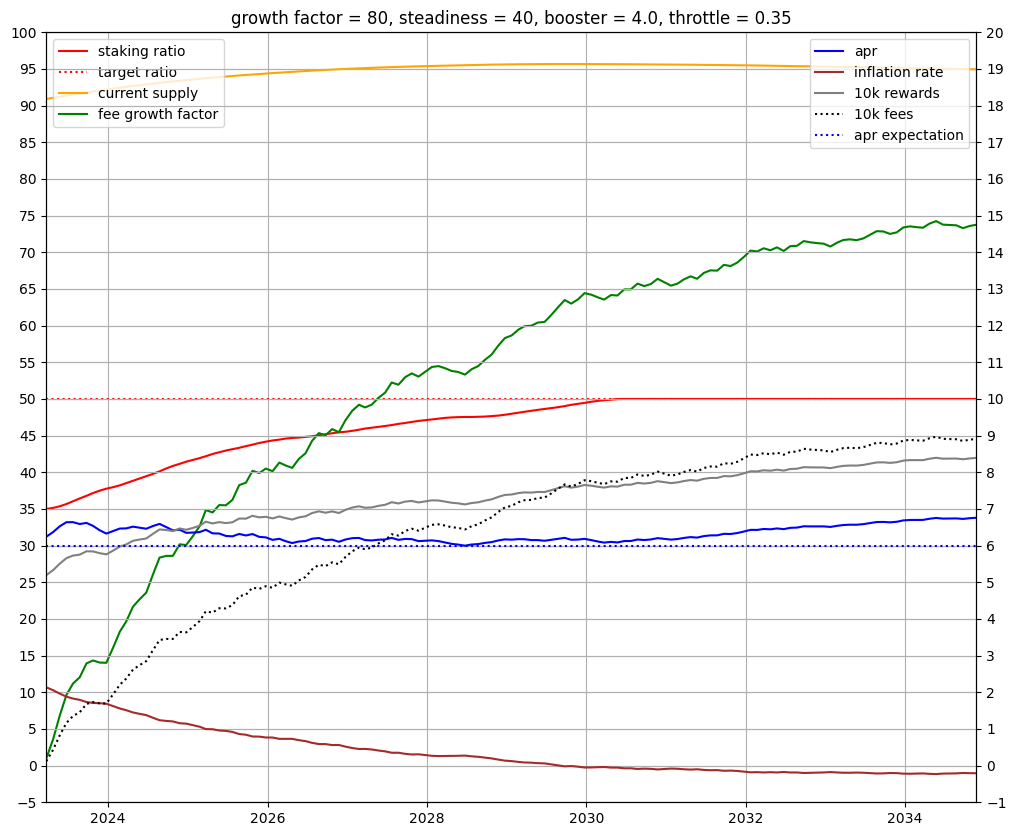

('min(apr)', 5.998385339533106, 'max(apr)', 8.412769418937312, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 95.67383586099405, 'max(factor)', 84.22900000000013, 'median(factor)', 80.1840000000001, 'median(tps)', 27.58830750000003, 'median(ratio)', 50.0, 'median(apr)', 8.13016187201504)


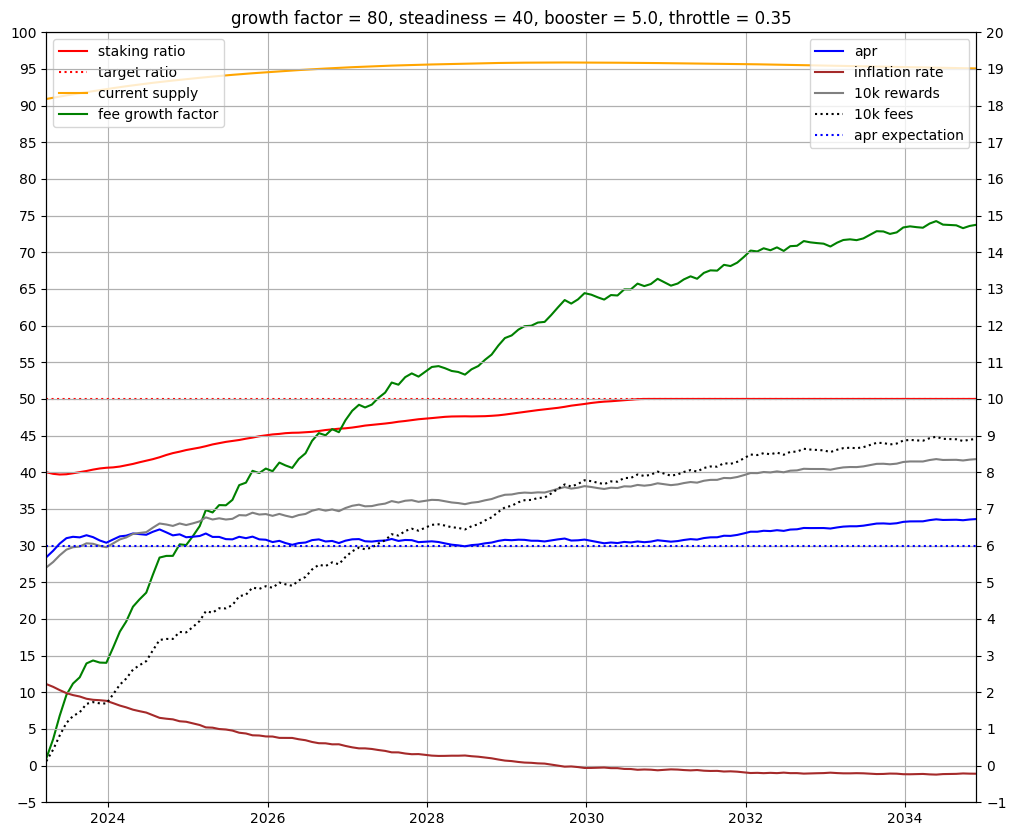

('min(apr)', 5.684317054334494, 'max(apr)', 8.412750688422628, 'min(ratio)', 39.69560808332121, 'max(ratio)', 50.0, 'max(supply)', 95.88014348266516, 'max(factor)', 84.22900000000013, 'median(factor)', 80.1840000000001, 'median(tps)', 27.58830750000003, 'median(ratio)', 50.0, 'median(apr)', 8.130160933953592)
--------------------------------------------------


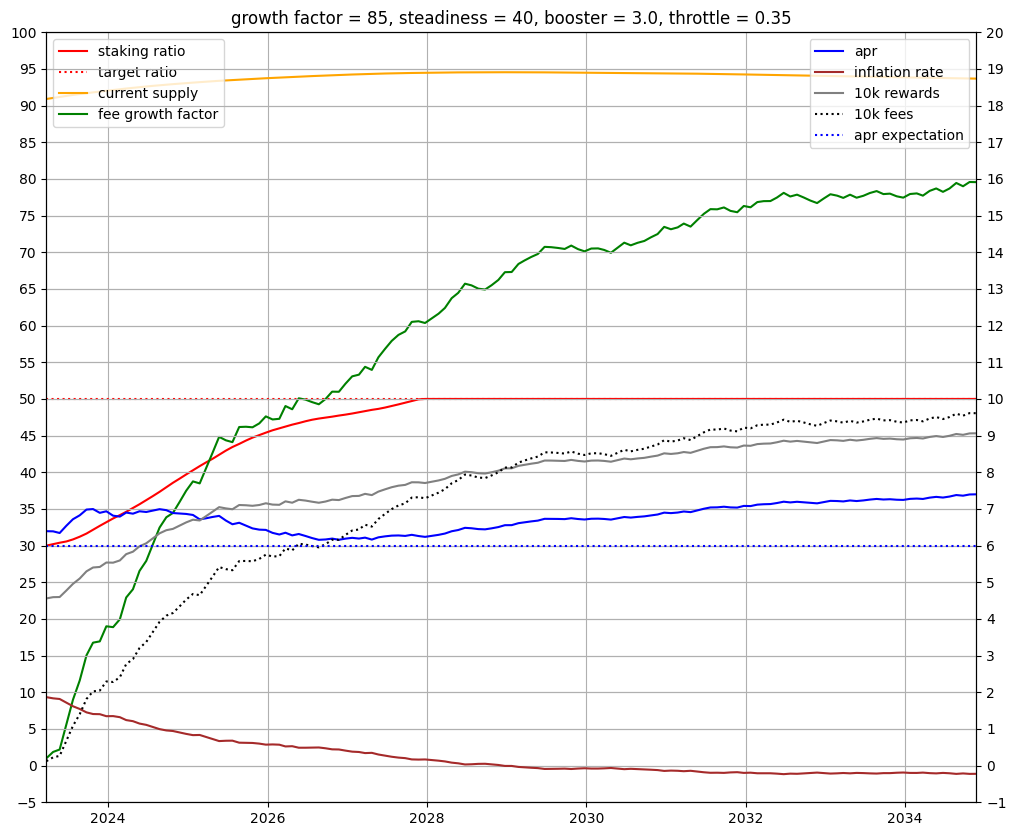

('min(apr)', 6.157957060503578, 'max(apr)', 8.982181398156126, 'min(ratio)', 30.0, 'max(ratio)', 50.0, 'max(supply)', 94.55174464211939, 'max(factor)', 88.22599999999987, 'median(factor)', 84.42099999999988, 'median(tps)', 29.04610031249996, 'median(ratio)', 50.0, 'median(apr)', 8.725078393410735)


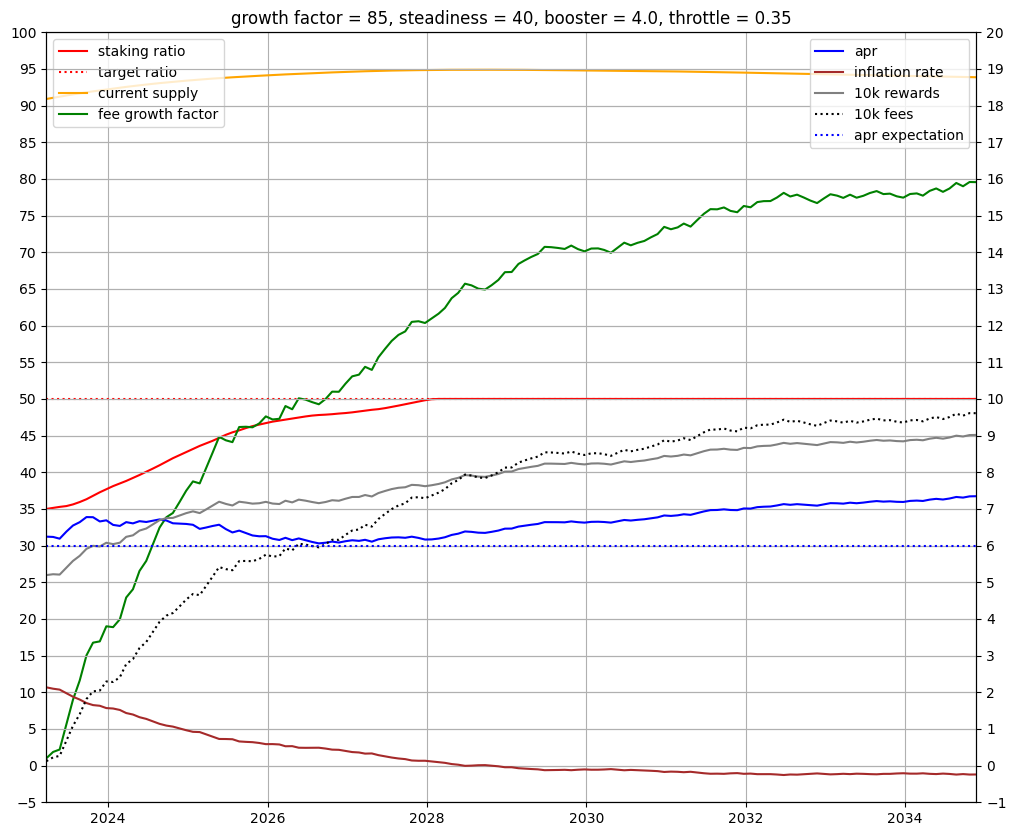

('min(apr)', 6.060592819184005, 'max(apr)', 8.98217891905545, 'min(ratio)', 35.0, 'max(ratio)', 50.0, 'max(supply)', 94.88770543642191, 'max(factor)', 88.22599999999987, 'median(factor)', 84.42099999999988, 'median(tps)', 29.04610031249996, 'median(ratio)', 50.0, 'median(apr)', 8.724984508948449)


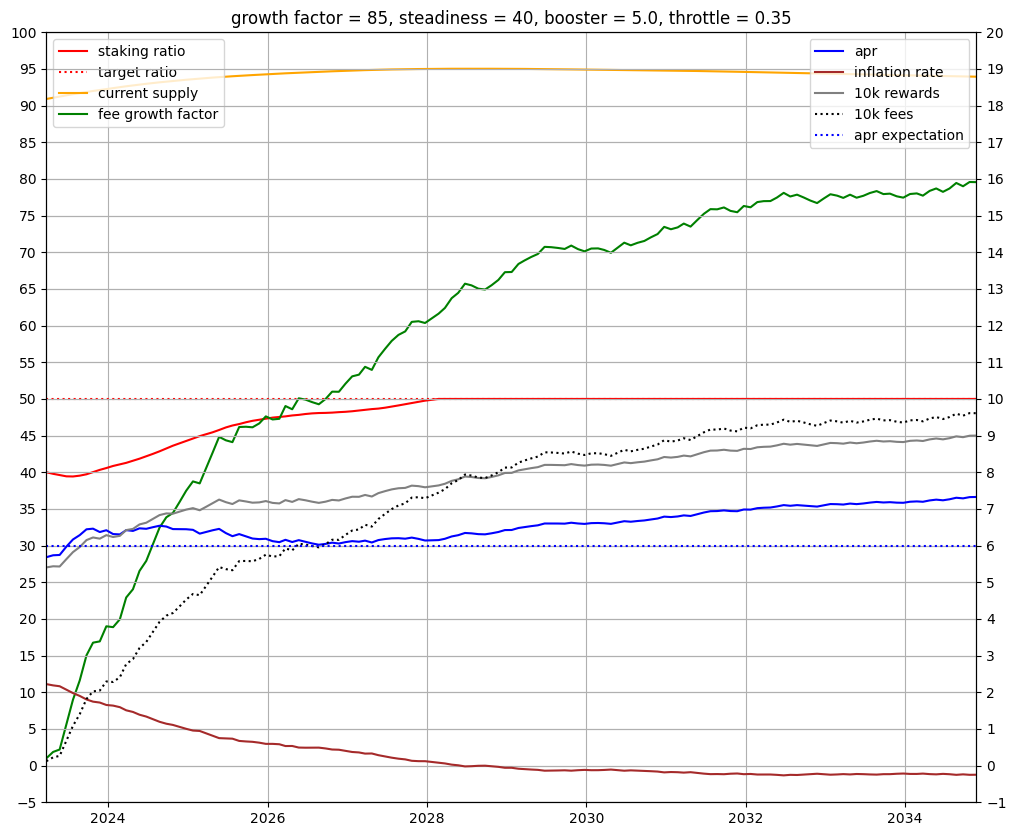

('min(apr)', 5.684317054334494, 'max(apr)', 8.982177940415397, 'min(ratio)', 39.428493737516675, 'max(ratio)', 50.0, 'max(supply)', 95.0287626295396, 'max(factor)', 88.22599999999987, 'median(factor)', 84.42099999999988, 'median(tps)', 29.04610031249996, 'median(ratio)', 50.0, 'median(apr)', 8.724908348629466)


In [1212]:
end = 140
steadiness = 40
block_reward = 100000.0

expected_apr = {0: 6.0} # the lower it is the higher the staking ratio will settle  
target_ratio = {0: 50.0}
generate(months, 25, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 2.0, 0.35)
print(display('growth factor = 25, steadiness = 40, booster = 2.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.5, 0.35)
print(display('growth factor = 25, steadiness = 40, booster = 3.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.5, 0.35)
print(display('growth factor = 25, steadiness = 40, booster = 4.5, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 30, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 2.0, 0.35)
print(display('growth factor = 30, steadiness = 40, booster = 2.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.5, 0.35)
print(display('growth factor = 30, steadiness = 40, booster = 3.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.5, 0.35)
print(display('growth factor = 30, steadiness = 40, booster = 4.5, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 35, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 2.5, 0.35)
print(display('growth factor = 35, steadiness = 40, booster = 2.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.5, 0.35)
print(display('growth factor = 35, steadiness = 40, booster = 3.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.5, 0.35)
print(display('growth factor = 35, steadiness = 40, booster = 4.5, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 40, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 2.5, 0.35)
print(display('growth factor = 40, steadiness = 40, booster = 2.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.5, 0.35)
print(display('growth factor = 40, steadiness = 40, booster = 3.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.5, 0.35)
print(display('growth factor = 40, steadiness = 40, booster = 4.5, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 45, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 2.5, 0.35)
print(display('growth factor = 45, steadiness = 40, booster = 2.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.5, 0.35)
print(display('growth factor = 45, steadiness = 40, booster = 3.5, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.5, 0.35)
print(display('growth factor = 45, steadiness = 40, booster = 4.5, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 50, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 50, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 50, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 50, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 55, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 55, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 55, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 55, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 60, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 60, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 3.0, 0.45)
print(display('growth factor = 60, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 60, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 65, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 4.0, 0.45)
print(display('growth factor = 65, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 65, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.45)
print(display('growth factor = 65, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 70, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 4.0, 0.45)
print(display('growth factor = 70, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 70, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.45)
print(display('growth factor = 70, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 75, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 75, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 75, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 75, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 80, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 80, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 80, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 80, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))
print('-' * 50)
generate(months, 85, steadiness)
simulate(months, block_reward, 30.0, 1910000000.0, 3.0, 0.35)
print(display('growth factor = 85, steadiness = 40, booster = 3.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 35.0, 1910000000.0, 4.0, 0.35)
print(display('growth factor = 85, steadiness = 40, booster = 4.0, throttle = 0.35', 0, end))
simulate(months, block_reward, 40.0, 1910000000.0, 5.0, 0.35)
print(display('growth factor = 85, steadiness = 40, booster = 5.0, throttle = 0.35', 0, end))

In [1218]:
def rewards(reserve, staked, ssn_reward_first, ssn_reward_last = 0):
    if ssn_reward_last == 0:
        ssn_reward_last = ssn_reward_first
    staking_ratio = staked / (21000000000.0 - reserve)
    zil = reserve - 2 * 22 * 365/12 * (95880.0 + 0.4 * 204000.0) - 15 * 22 * 365/12 * (95880.0 + (ssn_reward_first + ssn_reward_last) / 2 * 204000.0)
    reward_old = ssn_reward_last * 204000.0
    reward_new = staking_ratio * 4**((0.5 - staking_ratio)/0.5) * (100000.0 * (((1.0 - (21000000000.0 - zil)/21000000000.0))/0.1)**0.35 + 1208.0)
    print("SSN start | SSN end | reduced reward | new reward")
    print("{:4.2f}        {:4.2f}      {:5.0f}            {:5.0f}".format(ssn_reward_first, ssn_reward_last, reward_old, reward_new))
    print("init reserve | init depletion | reduced apr | new apr")
    print("{:11.0f}    {:6.4f}           {:6.4f}        {:6.4f}".format(21000000000.0 - zil, (21000000000.0 - zil) / 21000000000.0, reward_old * 22 * 365 / ((21000000000.0 - zil) * staking_ratio), reward_new * 22 * 365 / ((21000000000.0 - zil) * staking_ratio)))
    print("-" * 50)

reserve = 3638531049.0
staked = 6070361188.0
print("current staking ratio = {:5.3f}".format(staked / (21000000000.0 - reserve)))
print("current reserve | current apr | reduced apr")
print("{:11.0f}       {:6.4f}        {:6.4f}".format(21000000000.0 - reserve, (21000000000.0 - reserve) / 21000000000, 0.4 * 204000.0 * 22 * 365 / staked))
print("-" * 50)
rewards(reserve, staked, 0.40, 0.40)
rewards(reserve, staked, 0.35, 0.35)
rewards(reserve, staked, 0.30, 0.30)
rewards(reserve, staked, 0.25, 0.25)
rewards(reserve, staked, 0.40, 0.25)

current staking ratio = 0.350
current reserve | current apr | reduced apr
17361468951       0.8267        0.1079
--------------------------------------------------
SSN start | SSN end | reduced reward | new reward
0.40        0.40      81600            49079
init reserve | init depletion | reduced apr | new apr
19380451851    0.9229           0.0967        0.0582
--------------------------------------------------
SSN start | SSN end | reduced reward | new reward
0.35        0.35      71400            50129
init reserve | init depletion | reduced apr | new apr
19278069351    0.9180           0.0851        0.0597
--------------------------------------------------
SSN start | SSN end | reduced reward | new reward
0.30        0.30      61200            51140
init reserve | init depletion | reduced apr | new apr
19175686851    0.9131           0.0733        0.0612
--------------------------------------------------
SSN start | SSN end | reduced reward | new reward
0.25        0.25      51000